In [1]:
##Data Scraping - Housing Market Data
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np

chromedriver = "C:\\Users\\arosa\\Documents\\chromedriver.exe" ##path to chrome driver
browser = webdriver.Chrome(executable_path=chromedriver)

urls = ["https://www.interest.co.nz/charts/real-estate/median-price-reinz", 'https://www.interest.co.nz/charts/real-estate/median-house-price-growth', 'https://www.interest.co.nz/charts/real-estate/volumes-sold-reinz', 'https://www.interest.co.nz/charts/real-estate/volumes-sold-growth-reinz', 'https://www.interest.co.nz/charts/real-estate/days-sell', 'https://www.interest.co.nz/Charts/Real%20estate/Housing%20inventory']
headings = ['Median House Price', 'Median House Price Growth', 'Sales Volume', 'Sales Volume Growth', 'Days to Sell', 'Inventory']

mhp = {}
mhpg = {}
sv = {}
svg = {}
dts = {}
inv = {}
listofdicts = []
listofdicts.extend([mhp, mhpg, sv, svg, dts, inv])

position = 0
for i in listofdicts:
    browser.get(urls[position])

    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, "html.parser")

    date_list = []
    data_list = []
    for tr in soup.find_all('tr'):
        tds = tr.find_all('td')
        try:
            date_list.append(tds[0].text)
            data_list.append(tds[1].text)
        except IndexError:
            continue

    i.update(dict(zip(date_list, data_list)))
    position += 1
    time.sleep(2)

browser.close() 

df = pd.DataFrame.from_dict(listofdicts[0], orient='index', columns = [headings[0]])

position = 1
for i in listofdicts[1:]:
    temp_df = pd.DataFrame.from_dict(i, orient='index', columns=[headings[position]])
    df = pd.concat([df, temp_df], axis=1)
    position += 1
    
df = df.drop(columns='Inventory') ##dropping as not enough data
df = df.drop(df.index[:2]) ##dropping first two rows to clean up

df

Median House Price Median House Price Growth Sales Volume  \
Jan 31, 2014            400,000                       NaN        4,690   
Feb 28, 2014            415,000                       NaN        6,117   
Mar 31, 2014            440,000                       NaN        7,279   
Apr 30, 2014            430,000                     9.694        5,627   
May 31, 2014            430,000                    10.256        6,550   
...                         ...                       ...          ...   
Dec 31, 2020            745,000                    18.631        9,538   
Jan 31, 2021            730,000                    19.281        4,957   
Feb 28, 2021            780,000                    21.875        7,964   
Mar 31, 2021            825,000                     24.06        9,721   
Apr 30, 2021            810,000                    19.118        7,218   

             Sales Volume Growth Days to Sell  
Jan 31, 2014                 NaN           44  
Feb 28, 2014                 NaN           42  
Mar 31, 2014                 NaN           33  
Apr 30, 2014             -20.286           35  
May 31, 2014             -14.758           39  
...                          ...          ...  
Dec 31, 2020              45.774           27  
Jan 31, 2021               3.228           35  
Feb 28, 2021              14.573           30  
Mar 31, 2021              31.223           28  
Apr 30, 2021             419.654           29  

[88 rows x 5 columns]

In [2]:
df1 = df.replace({',':''},regex=True).apply(pd.to_numeric,1) ##convert strings to floats
df1.index = pd.to_datetime(df1.index) ##convert index to datetime

df1

Median House Price  Median House Price Growth  Sales Volume  \
2014-01-31            400000.0                        NaN        4690.0   
2014-02-28            415000.0                        NaN        6117.0   
2014-03-31            440000.0                        NaN        7279.0   
2014-04-30            430000.0                      9.694        5627.0   
2014-05-31            430000.0                     10.256        6550.0   
...                        ...                        ...           ...   
2020-12-31            745000.0                     18.631        9538.0   
2021-01-31            730000.0                     19.281        4957.0   
2021-02-28            780000.0                     21.875        7964.0   
2021-03-31            825000.0                     24.060        9721.0   
2021-04-30            810000.0                     19.118        7218.0   

            Sales Volume Growth  Days to Sell  
2014-01-31                  NaN          44.0  
2014-02-28                  NaN          42.0  
2014-03-31                  NaN          33.0  
2014-04-30              -20.286          35.0  
2014-05-31              -14.758          39.0  
...                         ...           ...  
2020-12-31               45.774          27.0  
2021-01-31                3.228          35.0  
2021-02-28               14.573          30.0  
2021-03-31               31.223          28.0  
2021-04-30              419.654          29.0  

[88 rows x 5 columns]

In [3]:
df1 = df1.dropna() ##drop rows with missing values

df1

Median House Price  Median House Price Growth  Sales Volume  \
2014-04-30            430000.0                      9.694        5627.0   
2014-05-31            430000.0                     10.256        6550.0   
2014-06-30            425000.0                      7.595        5675.0   
2014-07-31            416000.0                      8.052        5848.0   
2014-08-31            420000.0                      7.692        5443.0   
...                        ...                        ...           ...   
2020-12-31            745000.0                     18.631        9538.0   
2021-01-31            730000.0                     19.281        4957.0   
2021-02-28            780000.0                     21.875        7964.0   
2021-03-31            825000.0                     24.060        9721.0   
2021-04-30            810000.0                     19.118        7218.0   

            Sales Volume Growth  Days to Sell  
2014-04-30              -20.286          35.0  
2014-05-31              -14.758          39.0  
2014-06-30               -7.286          40.0  
2014-07-31              -13.491          38.0  
2014-08-31              -16.313          39.0  
...                         ...           ...  
2020-12-31               45.774          27.0  
2021-01-31                3.228          35.0  
2021-02-28               14.573          30.0  
2021-03-31               31.223          28.0  
2021-04-30              419.654          29.0  

[85 rows x 5 columns]

In [4]:
df_base = df1[:'2020-03-31'] ##dataframe of data up to April 2020 - the data I will use to predict April 2020 onward as if the lockdowns and border closures never happened

df_base

Median House Price  Median House Price Growth  Sales Volume  \
2014-04-30            430000.0                      9.694        5627.0   
2014-05-31            430000.0                     10.256        6550.0   
2014-06-30            425000.0                      7.595        5675.0   
2014-07-31            416000.0                      8.052        5848.0   
2014-08-31            420000.0                      7.692        5443.0   
...                        ...                        ...           ...   
2019-11-30            632000.0                      8.966        7627.0   
2019-12-31            628000.0                     12.143        6543.0   
2020-01-31            612000.0                     11.273        4802.0   
2020-02-29            640000.0                     14.286        6951.0   
2020-03-31            665000.0                     13.675        7408.0   

            Sales Volume Growth  Days to Sell  
2014-04-30              -20.286          35.0  
2014-05-31              -14.758          39.0  
2014-06-30               -7.286          40.0  
2014-07-31              -13.491          38.0  
2014-08-31              -16.313          39.0  
...                         ...           ...  
2019-11-30                1.020          33.0  
2019-12-31               16.923          31.0  
2020-01-31                7.692          42.0  
2020-02-29               13.356          36.0  
2020-03-31                2.703          30.0  

[72 rows x 5 columns]

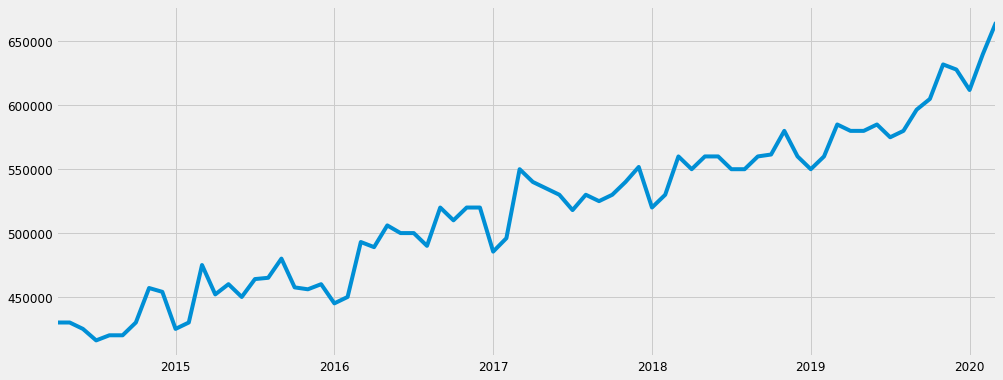

In [5]:
##Visualising Median House Price (Raw Data)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df_base['Median House Price'].plot(figsize = (15,6))
plt.show()

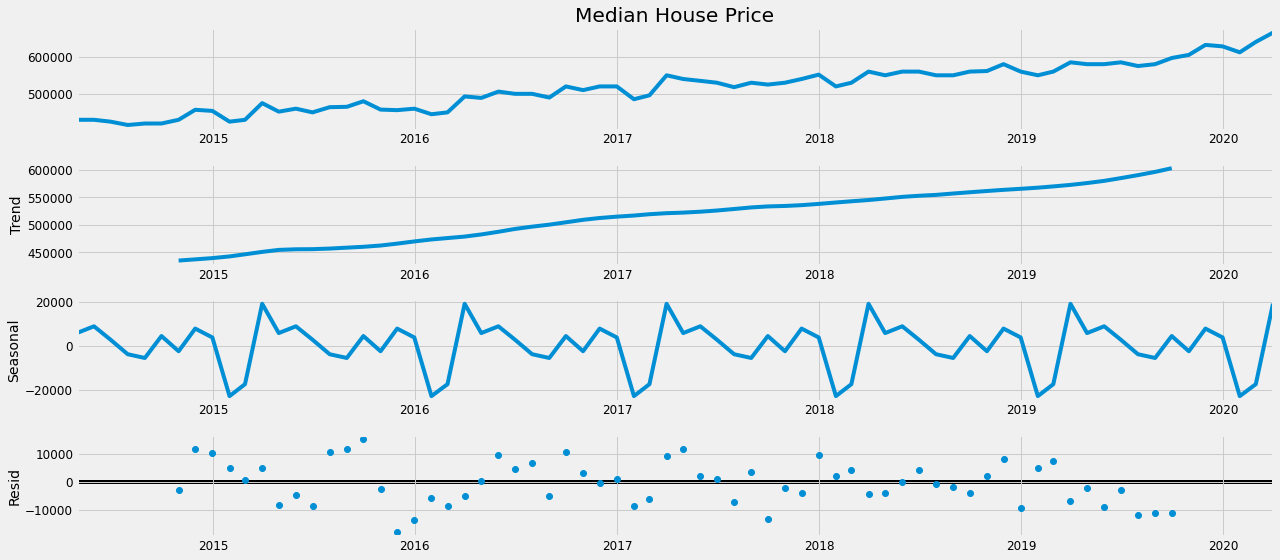

In [6]:
##Time Series Decomposition - decomposes a time series into trend, seasonality, and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_base['Median House Price'], model='additive')
fig = decomposition.plot()
plt.show()

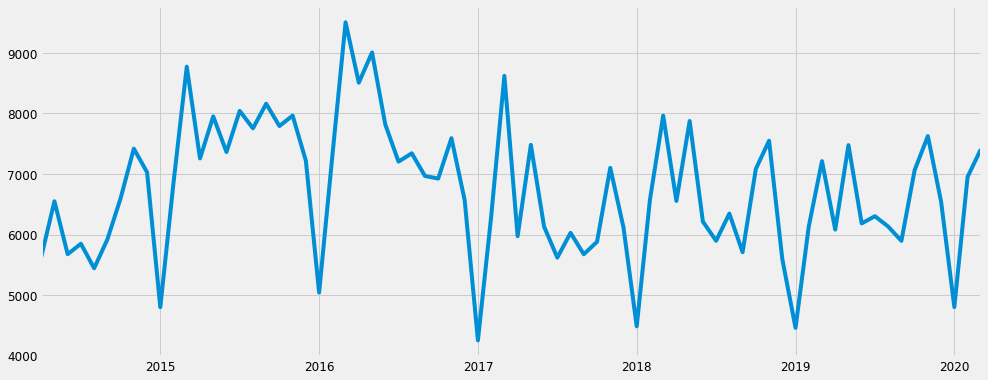

In [7]:
##Time Series Decomposition for sales
df_base['Sales Volume'].plot(figsize = (15,6))
plt.show()

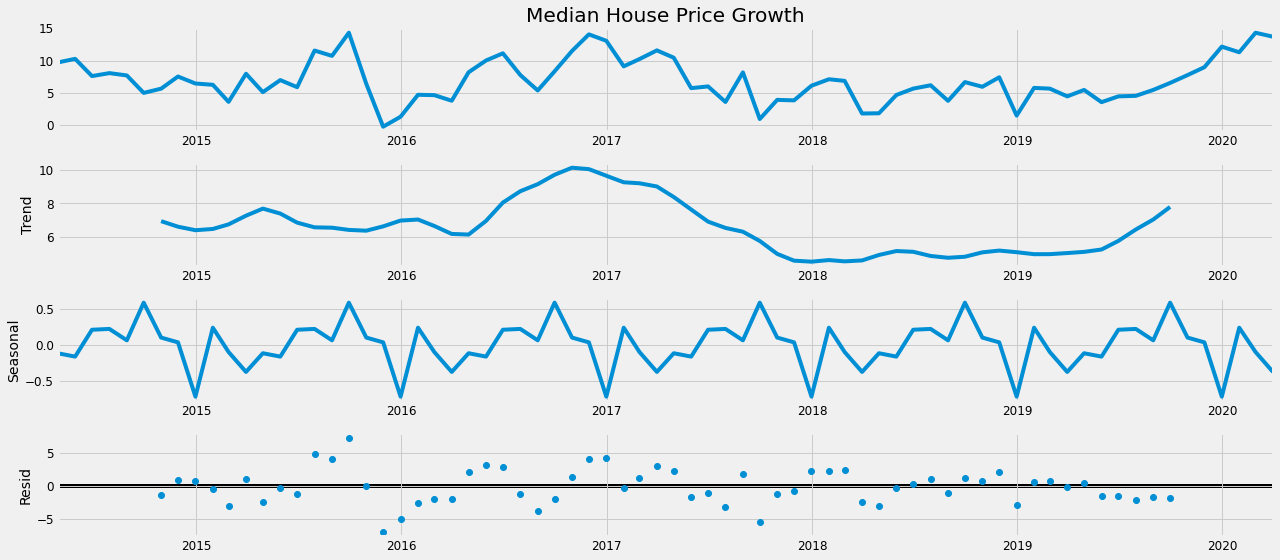

In [8]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_base['Median House Price Growth'], model='additive')
fig = decomposition.plot()
plt.show()

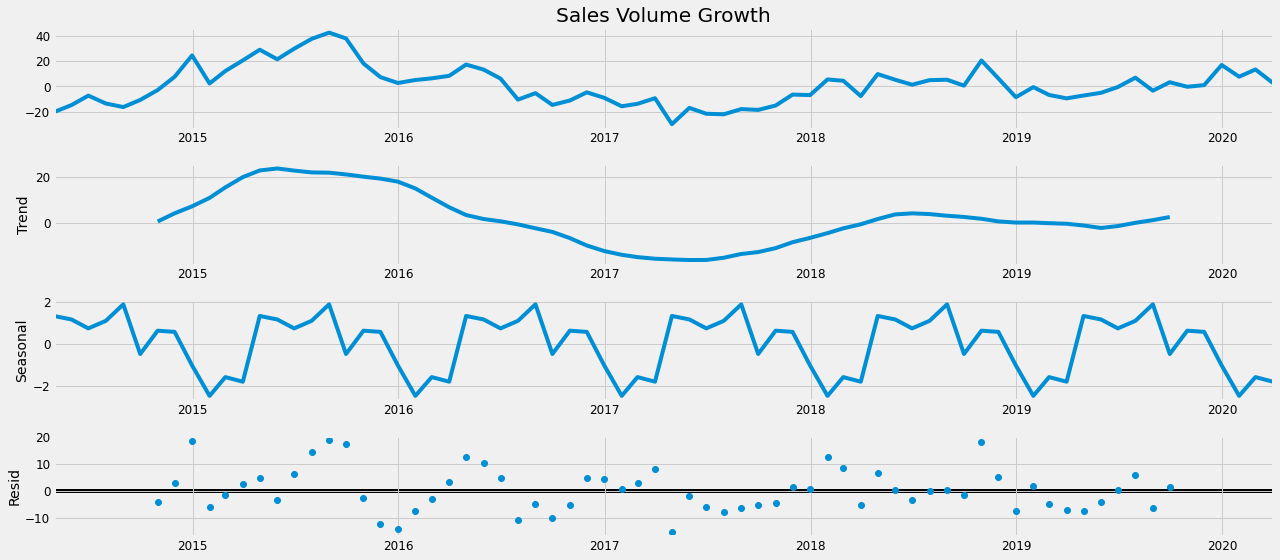

In [9]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_base['Sales Volume Growth'], model='additive')
fig = decomposition.plot()
plt.show()

In [119]:
##ARIMA Time Series Forecasting
import itertools
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

    ##Grid Search for optimal set of parameters for ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_base['Median House Price'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2072.9838888894064
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2293217.561793353
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1417.4732851339184
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1131.6587320112951
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1347.5396950029906
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1329.2154257888606
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1120.3686321732612
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1084.733512527498
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1996.8899583966486
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2330579.4743327256
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1365.3471954401368
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1081.9544404778626
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1697.0911577219683
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1642.7074803658552
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1129.2343670474324
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1071.0288994596854
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1566.970602163643
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1278.402668322

In [11]:
param

(1, 1, 1)

In [12]:
##ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:975.9671048063148 - lowest AIC value given above, therefore the optimal parameters for the ARIMA Time Series

In [120]:
##Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(df_base['Median House Price'], order=(0,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3232      0.223     -1.447      0.148      -0.761       0.114
ar.S.L12      -0.4198      0.267     -1.574      0.116      -0.942       0.103
ma.S.L12      -0.0261      0.233     -0.112      0.911      -0.483       0.431
sigma2      1.863e+08   1.95e-10   9.53e+17      0.000    1.86e+08    1.86e+08


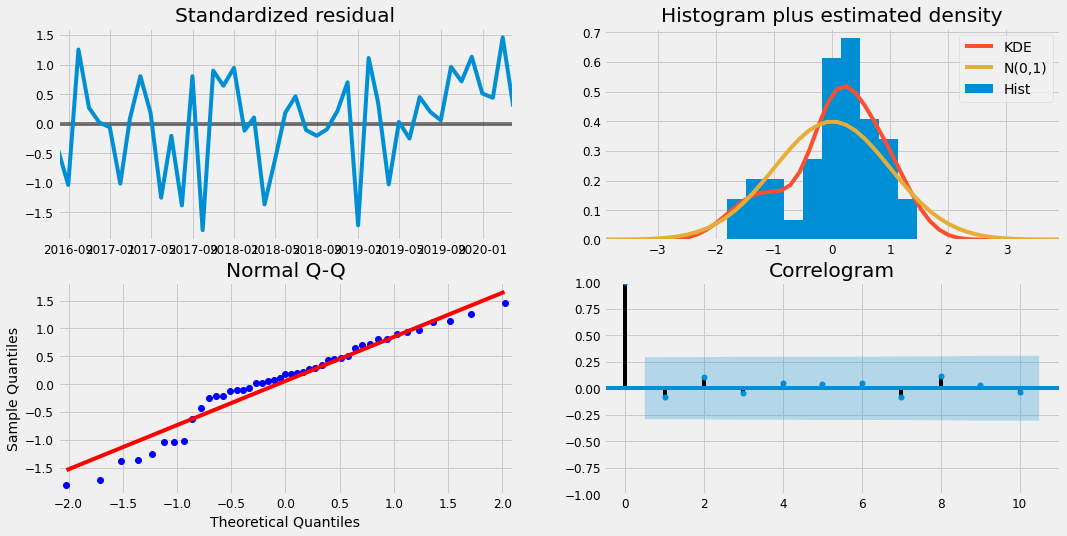

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

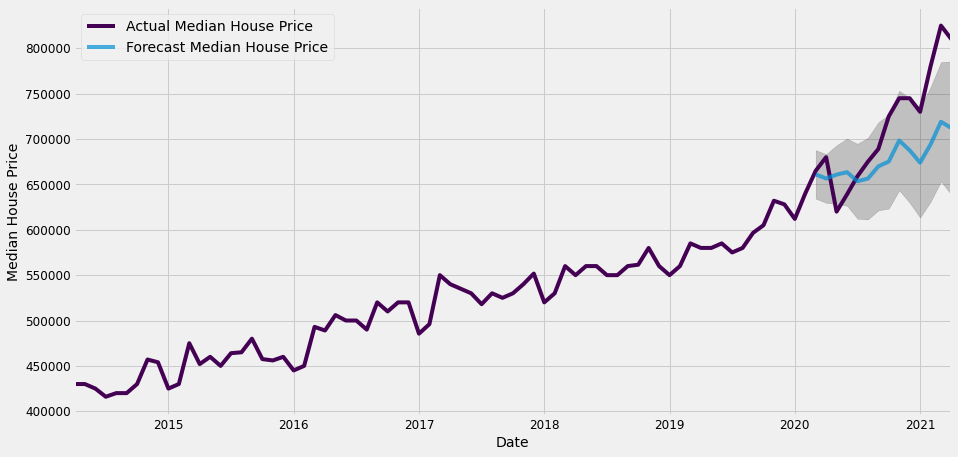

In [121]:
##Forecast validation
pred = results.get_prediction(start=pd.to_datetime('2020-03-31'), end=pd.to_datetime('2021-04-30') ,dynamic=False) ##code for prediction from Mar-20 to Apr-21
# pred = results.get_prediction(start=pd.to_datetime('2019-03-31'), end=pd.to_datetime('2020-04-30') ,dynamic=False) ##code for checking MSE and RMSE of prediction
pred_ci = pred.conf_int()

ax = df1['Median House Price']['2014-04-30':].plot(label='Actual Median House Price', cmap='viridis')
pred.predicted_mean.plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

In [16]:
pred.predicted_mean

2020-03-31    661064.159014
2020-04-30    656500.398748
2020-05-31    660791.057024
2020-06-30    663503.349097
2020-07-31    653483.838949
2020-08-31    656387.549241
2020-09-30    669878.819296
2020-10-31    675240.745135
2020-11-30    698352.123936
2020-12-31    687584.208809
2021-01-31    674005.711144
2021-02-28    693980.568121
2021-03-31    719045.896793
2021-04-30    712048.490742
Freq: M, dtype: float64

In [17]:
pred_ci

lower Median House Price  upper Median House Price
2020-03-31             634315.805206             687812.512822
2020-04-30             629752.044940             683248.752557
2020-05-31             628492.524042             693089.590007
2020-06-30             626477.465796             700529.232398
2020-07-31             612269.316804             694698.361093
2020-08-31             611372.466914             701402.631569
2020-09-30             621359.973078             718397.665514
2020-10-31             623454.653955             727026.836315
2020-11-30             643493.031334             753211.216538
2020-12-31             629815.351780             745353.065839
2021-01-31             613466.784462             734544.637827
2021-02-28             630792.891749             757168.244493
2021-03-31             653316.122362             784775.671223
2021-04-30             638533.137448             785563.844036

In [18]:
mhp_forecasted = pred.predicted_mean
mhp_observed = df1['Median House Price']['2014-03-31':]

mse = ((mhp_forecasted - mhp_observed) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3062755108.75
The Root Mean Squared Error of our forecasts is 55342.16


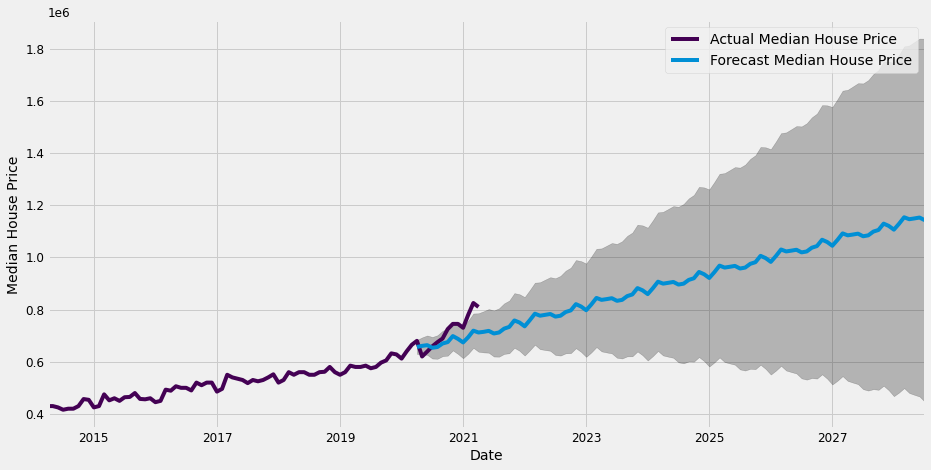

In [122]:
##Predicting and visualising further forecasts (as if COVID was never a thing):
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df1['Median House Price'].plot(label='Actual Median House Price', figsize=(14, 7), cmap='viridis')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast Median House Price')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()
plt.show()

In [20]:
##Recap:
##What I have so far: a model that will predict NZ median house prices as if April 2020 onward was "business as usual"
##What I also have: several sets of economic data and the code to clean that down to monthly data
##What I'm after: Actual median house price prediction between May 2021 and Jan 2022, assuming the economic landscape remains as it is now (borders closed etc.)
##What I will need to do that: machine learning of some variety

In [21]:
##goal: feasible prediction for NZ average house prices May 2021 - Jan 2022
##How to get this: a model that can feasibly predict house price changes based on economic data - the key thing here is that April 2020 changed trajectory significantly - so I want to make predictions based on that trajectory

In [22]:
##Reading in Economic Data
data_df = pd.read_excel('C:\\Users\\arosa\\Documents\\House Price Forecasting Data.xlsx', index_col=0)
data_df['Median House Price'] = data_df['Median House Price'].astype(float)
data_df['Sales Volume'] = data_df['Sales Volume'].astype(float)
data_df['Days to Sell'] = data_df['Days to Sell'].astype(float)
pd.to_datetime(data_df.index)

data_df

Median House Price  Annual Median House Price Growth  \
Date                                                               
2014-01-31            400000.0                               NaN   
2014-02-28            415000.0                               NaN   
2014-03-31            440000.0                               NaN   
2014-04-30            430000.0                             9.694   
2014-05-31            430000.0                            10.256   
...                        ...                               ...   
2020-12-31            745000.0                            18.631   
2021-01-31            730000.0                            19.281   
2021-02-28            780000.0                            21.875   
2021-03-31            825000.0                            24.060   
2021-04-30            810000.0                            19.118   

            Sales Volume  Annual Sales Volume Growth  Days to Sell  \
Date                                                                 
2014-01-31        4690.0                         NaN          44.0   
2014-02-28        6117.0                         NaN          42.0   
2014-03-31        7279.0                         NaN          33.0   
2014-04-30        5627.0                     -20.286          35.0   
2014-05-31        6550.0                     -14.758          39.0   
...                  ...                         ...           ...   
2020-12-31        9538.0                      45.774          27.0   
2021-01-31        4957.0                       3.228          35.0   
2021-02-28        7964.0                      14.573          30.0   
2021-03-31        9721.0                      31.223          28.0   
2021-04-30        7218.0                     419.654          29.0   

            Employment Rate  Unemployment Rate  \
Date                                             
2014-01-31              NaN                NaN   
2014-02-28              NaN                NaN   
2014-03-31             64.9                5.9   
2014-04-30              NaN                NaN   
2014-05-31              NaN                NaN   
...                     ...                ...   
2020-12-31             67.1                4.9   
2021-01-31              NaN                NaN   
2021-02-28              NaN                NaN   
2021-03-31             67.2                4.9   
2021-04-30              NaN                NaN   

            Permanent Migration - Arrivals (Actual)  \
Date                                                  
2014-01-31                                  10241.0   
2014-02-28                                  10893.0   
2014-03-31                                   8386.0   
2014-04-30                                   7130.0   
2014-05-31                                   6946.0   
...                                             ...   
2020-12-31                                   3912.0   
2021-01-31                                   2805.0   
2021-02-28                                   2248.0   
2021-03-31                                      NaN   
2021-04-30                                      NaN   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-12-31                                     4122.0   
2021-01-31                                     2254.0   
2021-02-28                                     1574.0   
2021-03-31                                        NaN   
2021-04-30                                        NaN   

            Building Consents (Actual)  Consumer Confidence  \
Date                                        

In [23]:
##Cleaning the Economic Data Dataframe - filling gaps using linear interpolation
data_df = data_df.interpolate(method='linear', axis=0).ffill().bfill()

data_df

Median House Price  Annual Median House Price Growth  \
Date                                                               
2014-01-31            400000.0                             9.694   
2014-02-28            415000.0                             9.694   
2014-03-31            440000.0                             9.694   
2014-04-30            430000.0                             9.694   
2014-05-31            430000.0                            10.256   
...                        ...                               ...   
2020-12-31            745000.0                            18.631   
2021-01-31            730000.0                            19.281   
2021-02-28            780000.0                            21.875   
2021-03-31            825000.0                            24.060   
2021-04-30            810000.0                            19.118   

            Sales Volume  Annual Sales Volume Growth  Days to Sell  \
Date                                                                 
2014-01-31        4690.0                     -20.286          44.0   
2014-02-28        6117.0                     -20.286          42.0   
2014-03-31        7279.0                     -20.286          33.0   
2014-04-30        5627.0                     -20.286          35.0   
2014-05-31        6550.0                     -14.758          39.0   
...                  ...                         ...           ...   
2020-12-31        9538.0                      45.774          27.0   
2021-01-31        4957.0                       3.228          35.0   
2021-02-28        7964.0                      14.573          30.0   
2021-03-31        9721.0                      31.223          28.0   
2021-04-30        7218.0                     419.654          29.0   

            Employment Rate  Unemployment Rate  \
Date                                             
2014-01-31        64.900000           5.900000   
2014-02-28        64.900000           5.900000   
2014-03-31        64.900000           5.900000   
2014-04-30        64.766667           5.633333   
2014-05-31        64.633333           5.366667   
...                     ...                ...   
2020-12-31        67.100000           4.900000   
2021-01-31        67.133333           4.900000   
2021-02-28        67.166667           4.900000   
2021-03-31        67.200000           4.900000   
2021-04-30        67.200000           4.900000   

            Permanent Migration - Arrivals (Actual)  \
Date                                                  
2014-01-31                                  10241.0   
2014-02-28                                  10893.0   
2014-03-31                                   8386.0   
2014-04-30                                   7130.0   
2014-05-31                                   6946.0   
...                                             ...   
2020-12-31                                   3912.0   
2021-01-31                                   2805.0   
2021-02-28                                   2248.0   
2021-03-31                                   2248.0   
2021-04-30                                   2248.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-12-31                                     4122.0   
2021-01-31                                     2254.0   
2021-02-28                                     1574.0   
2021-03-31                                     1574.0   
2021-04-30                                     1574.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                        

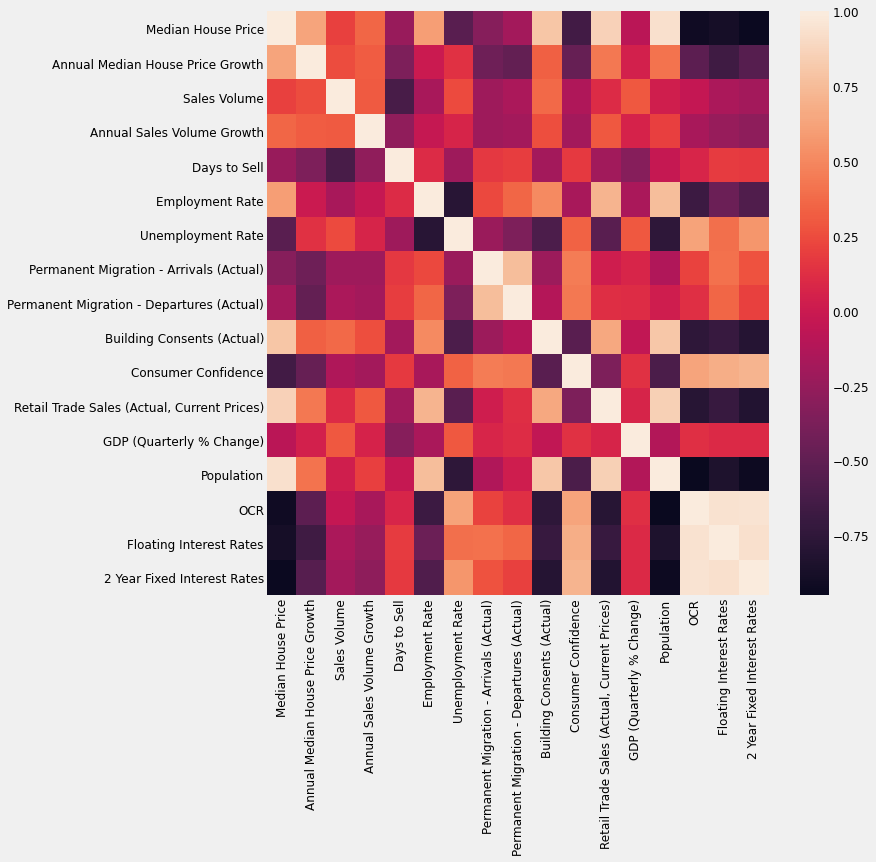

In [116]:
##Correlation matrix
import seaborn as sns

corrMatrix = data_df.corr()
plt.rcParams['figure.figsize'] = (10.0, 10.0)
sns.heatmap(corrMatrix, center=0, cmap="rocket")
plt.show()

In [25]:
##MHP Forecast model - first attempt - Elastic Net Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

##Separate features and target
X_target = data_df['Median House Price']
# feature_df = data_df.loc[:, data_df.columns != 'Median House Price', data_df.columns != 'Median House Price Growth', data_df.columns != 'Sales Volume']
feature_df = data_df.loc[:, data_df.columns != 'Median House Price']
feature_df = feature_df.loc[:, feature_df.columns != 'Annual Median House Price Growth']
feature_df = feature_df.loc[:, feature_df.columns != 'Sales Volume']

feature_df

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
Date                                                                    
2014-01-31                     -20.286          44.0        64.900000   
2014-02-28                     -20.286          42.0        64.900000   
2014-03-31                     -20.286          33.0        64.900000   
2014-04-30                     -20.286          35.0        64.766667   
2014-05-31                     -14.758          39.0        64.633333   
...                                ...           ...              ...   
2020-12-31                      45.774          27.0        67.100000   
2021-01-31                       3.228          35.0        67.133333   
2021-02-28                      14.573          30.0        67.166667   
2021-03-31                      31.223          28.0        67.200000   
2021-04-30                     419.654          29.0        67.200000   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
Date                                                                     
2014-01-31           5.900000                                  10241.0   
2014-02-28           5.900000                                  10893.0   
2014-03-31           5.900000                                   8386.0   
2014-04-30           5.633333                                   7130.0   
2014-05-31           5.366667                                   6946.0   
...                       ...                                      ...   
2020-12-31           4.900000                                   3912.0   
2021-01-31           4.900000                                   2805.0   
2021-02-28           4.900000                                   2248.0   
2021-03-31           4.900000                                   2248.0   
2021-04-30           4.900000                                   2248.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-12-31                                     4122.0   
2021-01-31                                     2254.0   
2021-02-28                                     1574.0   
2021-03-31                                     1574.0   
2021-04-30                                     1574.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                                          
2014-01-31                      1644.0                135.8   
2014-02-28                      1768.0                133.0   
2014-03-31                      1999.0                132.0   
2014-04-30                      2082.0                133.5   
2014-05-31                      2125.0                127.6   
...                                ...                  ...   
2020-12-31                      3605.0                112.0   
2021-01-31                      3605.0                113.8   
2021-02-28                      3605.0                113.1   
2021-03-31                      3605.0                110.8   
2021-04-30                      3605.0                110.8   

            Retail Trade Sales (Actual, Current Prices)  \
Date                                                      
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2020-12-31                                 28209.600000   
2021-0

In [26]:
feature_df_base = feature_df[:'2020-03-31'] ##dataframe for building the model with pre-lockdown data
X_target_base = data_df['Median House Price'][:'2020-03-31'] ##target for building the model with pre-lockdown data

feature_df_base

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
Date                                                                    
2014-01-31                     -20.286          44.0        64.900000   
2014-02-28                     -20.286          42.0        64.900000   
2014-03-31                     -20.286          33.0        64.900000   
2014-04-30                     -20.286          35.0        64.766667   
2014-05-31                     -14.758          39.0        64.633333   
...                                ...           ...              ...   
2019-11-30                       1.020          33.0        67.766667   
2019-12-31                      16.923          31.0        67.900000   
2020-01-31                       7.692          42.0        67.866667   
2020-02-29                      13.356          36.0        67.833333   
2020-03-31                       2.703          30.0        67.800000   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
Date                                                                     
2014-01-31           5.900000                                  10241.0   
2014-02-28           5.900000                                  10893.0   
2014-03-31           5.900000                                   8386.0   
2014-04-30           5.633333                                   7130.0   
2014-05-31           5.366667                                   6946.0   
...                       ...                                      ...   
2019-11-30           4.066667                                  18224.0   
2019-12-31           4.100000                                  19461.0   
2020-01-31           4.233333                                  20056.0   
2020-02-29           4.366667                                  21382.0   
2020-03-31           4.500000                                  16704.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2019-11-30                                     9689.0   
2019-12-31                                    11418.0   
2020-01-31                                     8924.0   
2020-02-29                                     6509.0   
2020-03-31                                     6191.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                                          
2014-01-31                      1644.0                135.8   
2014-02-28                      1768.0                133.0   
2014-03-31                      1999.0                132.0   
2014-04-30                      2082.0                133.5   
2014-05-31                      2125.0                127.6   
...                                ...                  ...   
2019-11-30                      3238.0                120.7   
2019-12-31                      2955.0                123.3   
2020-01-31                      2564.0                122.7   
2020-02-29                      3285.0                122.1   
2020-03-31                      2915.0                106.0   

            Retail Trade Sales (Actual, Current Prices)  \
Date                                                      
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2019-11-30                                 25743.166667   
2019-1

R2:0.9858, MSE:109841891.2793, RMSE:10480.5482


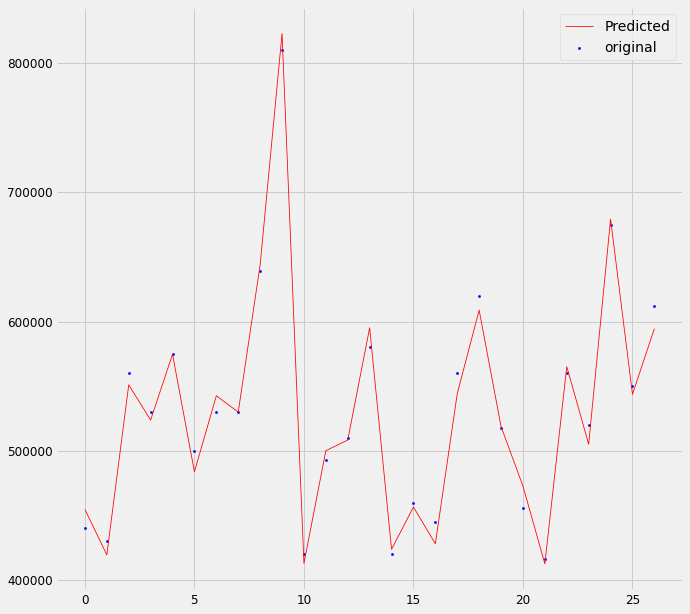

In [27]:
##Split the data and training - full dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, X_target, test_size=0.3, random_state=0)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)

ypred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}".format(score, mse, np.sqrt(mse)))

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

In [28]:
data_df.loc['2021-1-31']

Median House Price                             7.300000e+05
Annual Median House Price Growth               1.928100e+01
Sales Volume                                   4.957000e+03
Annual Sales Volume Growth                     3.228000e+00
Days to Sell                                   3.500000e+01
Employment Rate                                6.713333e+01
Unemployment Rate                              4.900000e+00
Permanent Migration - Arrivals (Actual)        2.805000e+03
Permanent Migration - Departures (Actual)      2.254000e+03
Building Consents (Actual)                     3.605000e+03
Consumer Confidence                            1.138000e+02
Retail Trade Sales (Actual, Current Prices)    2.820960e+04
GDP (Quarterly % Change)                      -1.000000e+00
Population                                     5.084300e+06
OCR                                            2.500000e-01
Floating Interest Rates                        4.500000e+00
2 Year Fixed Interest Rates             

In [29]:
##Some test predictions using the full data model:
Xnew = feature_df.loc['2021-1-31'].to_numpy()
Xnew = Xnew.reshape(1, -1)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[ 3.22800000e+00  3.50000000e+01  6.71333333e+01  4.90000000e+00
  2.80500000e+03  2.25400000e+03  3.60500000e+03  1.13800000e+02
  2.82096000e+04 -1.00000000e+00  5.08430000e+06  2.50000000e-01
  4.50000000e+00  3.50000000e+00], Predicted=748892.4717513002


R2:0.9637, MSE:117709638.1495, RMSE:10849.4073


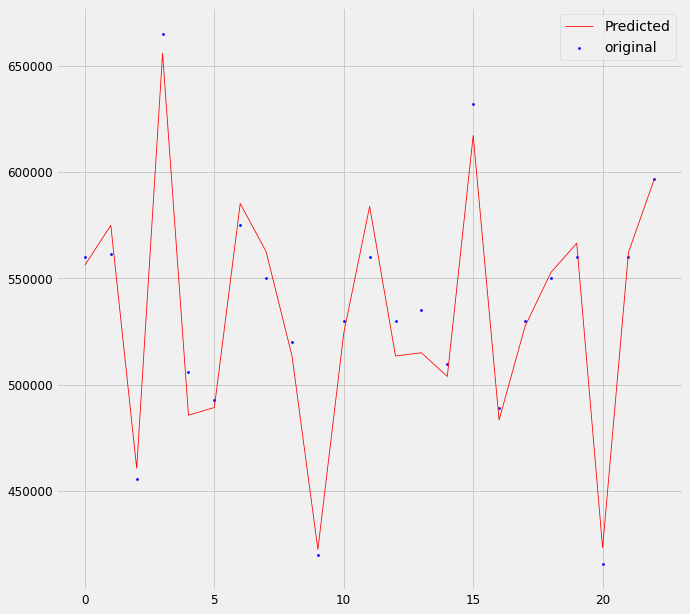

In [30]:
##Split the data and training - pre-lockdown dataset
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(feature_df_base, X_target_base, test_size=0.3, random_state=0)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

elastic_cv_base = ElasticNetCV(alphas=alphas, cv=5)
model_base = elastic_cv_base.fit(X_train_base, y_train_base)

ypred_base = model_base.predict(X_test_base)
score_base = model_base.score(X_test_base, y_test_base)
mse_base = mean_squared_error(y_test_base, ypred_base)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}".format(score_base, mse_base, np.sqrt(mse_base)))

x_ax_base = range(len(X_test_base))
plt.scatter(x_ax_base, y_test_base, s=5, color="blue", label="original")
plt.plot(x_ax_base, ypred_base, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

In [31]:
##So now I have the trained model (full dataset seems more accurate), how do I make predictions to the end of 2021?

In [32]:
##also - would be a good idea to set up with confidence intervals:
print('alpha: %f' % model.alpha_) ##can probably get confidence intervals using this code + this: https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed
##note: can probably get a better alpha for the models too if not defined in that list - default settings are 100 alphas to test using alphas=none (or just not specifying)

alpha: 0.001000


In [33]:
##FORECASTING TEST VER 1 STARTS HERE - result: model seems to work well generally, but forecasted variables used for 2020 needs some more thought.
##Plan: Mass SARIMA/ARIMA on economic data, then feed that back to the model - cut data_df back to Dec 2020 to start with so some of the remaining NaNs will be forecast

forecast_df = data_df[:'2020-12-31']

forecast_df

Median House Price  Annual Median House Price Growth  \
Date                                                               
2014-01-31            400000.0                             9.694   
2014-02-28            415000.0                             9.694   
2014-03-31            440000.0                             9.694   
2014-04-30            430000.0                             9.694   
2014-05-31            430000.0                            10.256   
...                        ...                               ...   
2020-08-31            675000.0                            16.379   
2020-09-30            689000.0                            15.489   
2020-10-31            725000.0                            19.835   
2020-11-30            745000.0                            17.880   
2020-12-31            745000.0                            18.631   

            Sales Volume  Annual Sales Volume Growth  Days to Sell  \
Date                                                                 
2014-01-31        4690.0                     -20.286          44.0   
2014-02-28        6117.0                     -20.286          42.0   
2014-03-31        7279.0                     -20.286          33.0   
2014-04-30        5627.0                     -20.286          35.0   
2014-05-31        6550.0                     -14.758          39.0   
...                  ...                         ...           ...   
2020-08-31        7783.0                      26.924          34.0   
2020-09-30        8377.0                      42.079          32.0   
2020-10-31        9136.0                      29.350          29.0   
2020-11-30       10147.0                      33.041          29.0   
2020-12-31        9538.0                      45.774          27.0   

            Employment Rate  Unemployment Rate  \
Date                                             
2014-01-31        64.900000           5.900000   
2014-02-28        64.900000           5.900000   
2014-03-31        64.900000           5.900000   
2014-04-30        64.766667           5.633333   
2014-05-31        64.633333           5.366667   
...                     ...                ...   
2020-08-31        66.500000           4.700000   
2020-09-30        66.300000           5.100000   
2020-10-31        66.566667           5.033333   
2020-11-30        66.833333           4.966667   
2020-12-31        67.100000           4.900000   

            Permanent Migration - Arrivals (Actual)  \
Date                                                  
2014-01-31                                  10241.0   
2014-02-28                                  10893.0   
2014-03-31                                   8386.0   
2014-04-30                                   7130.0   
2014-05-31                                   6946.0   
...                                             ...   
2020-08-31                                   4220.0   
2020-09-30                                   4323.0   
2020-10-31                                   3821.0   
2020-11-30                                   3365.0   
2020-12-31                                   3912.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-08-31                                     2671.0   
2020-09-30                                     3246.0   
2020-10-31                                     2709.0   
2020-11-30                                     2960.0   
2020-12-31                                     4122.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                        

In [34]:
##Run SARIMA on all data except median house price, median house price growth, and sales volume
forecast_df_1 = forecast_df.drop(columns=['Median House Price', 'Annual Median House Price Growth', 'Sales Volume'])

forecast_df_1

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
Date                                                                    
2014-01-31                     -20.286          44.0        64.900000   
2014-02-28                     -20.286          42.0        64.900000   
2014-03-31                     -20.286          33.0        64.900000   
2014-04-30                     -20.286          35.0        64.766667   
2014-05-31                     -14.758          39.0        64.633333   
...                                ...           ...              ...   
2020-08-31                      26.924          34.0        66.500000   
2020-09-30                      42.079          32.0        66.300000   
2020-10-31                      29.350          29.0        66.566667   
2020-11-30                      33.041          29.0        66.833333   
2020-12-31                      45.774          27.0        67.100000   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
Date                                                                     
2014-01-31           5.900000                                  10241.0   
2014-02-28           5.900000                                  10893.0   
2014-03-31           5.900000                                   8386.0   
2014-04-30           5.633333                                   7130.0   
2014-05-31           5.366667                                   6946.0   
...                       ...                                      ...   
2020-08-31           4.700000                                   4220.0   
2020-09-30           5.100000                                   4323.0   
2020-10-31           5.033333                                   3821.0   
2020-11-30           4.966667                                   3365.0   
2020-12-31           4.900000                                   3912.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-08-31                                     2671.0   
2020-09-30                                     3246.0   
2020-10-31                                     2709.0   
2020-11-30                                     2960.0   
2020-12-31                                     4122.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                                          
2014-01-31                      1644.0                135.8   
2014-02-28                      1768.0                133.0   
2014-03-31                      1999.0                132.0   
2014-04-30                      2082.0                133.5   
2014-05-31                      2125.0                127.6   
...                                ...                  ...   
2020-08-31                      3147.0                100.2   
2020-09-30                      3605.0                100.0   
2020-10-31                      3605.0                108.7   
2020-11-30                      3605.0                106.9   
2020-12-31                      3605.0                112.0   

            Retail Trade Sales (Actual, Current Prices)  \
Date                                                      
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2020-08-31                                 23424.200000   
2020-0

In [35]:
##use forecast_df_1 for this

cols_list = forecast_df_1.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct = {}
for i in cols_list:
    dct['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(forecast_df_1[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(forecast_df_1[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2020-12-31'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##code for prediction from Mar-20 to Apr-21
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(forecast_df_1, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct['%s' % i] = forecast_df_1[i].to_list()
        dct['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct['%s' % i] = forecast_df_1[i].to_list()
        dct['%s' % i].append(pred.predicted_mean.to_list())

In [36]:
dct1 = {key: value[:] for key, value in dct.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct1.items():
    dct1[key] = list(flatten(dct1[key]))

In [37]:
index = pd.date_range(start = '2014-01-31', end = '2022-02-28', freq = 'M')

forecast_df_3 = pd.DataFrame.from_records(dct1, index = index)
forecast_df_3

2 Year Fixed Interest Rates  Annual Sales Volume Growth  \
2014-01-31                     6.100000                  -20.286000   
2014-02-28                     6.000000                  -20.286000   
2014-03-31                     6.200000                  -20.286000   
2014-04-30                     6.200000                  -20.286000   
2014-05-31                     6.200000                  -14.758000   
...                                 ...                         ...   
2021-10-31                     3.241461                   30.217722   
2021-11-30                     3.221958                   27.244954   
2021-12-31                     3.203843                   27.720600   
2022-01-31                     3.187018                   33.894712   
2022-02-28                     3.171390                   29.140964   

            Building Consents (Actual)  Consumer Confidence  Days to Sell  \
2014-01-31                 1644.000000           135.800000     44.000000   
2014-02-28                 1768.000000           133.000000     42.000000   
2014-03-31                 1999.000000           132.000000     33.000000   
2014-04-30                 2082.000000           133.500000     35.000000   
2014-05-31                 2125.000000           127.600000     39.000000   
...                                ...                  ...           ...   
2021-10-31                 3718.386372            98.917596     32.573274   
2021-11-30                 3760.704057           103.691195     29.745421   
2021-12-31                 3773.548286           103.982888     29.618892   
2022-01-31                 3582.630243           107.217848     27.658621   
2022-02-28                 2968.843810           108.104960     40.617641   

            Employment Rate  Floating Interest Rates  \
2014-01-31        64.900000                 5.800000   
2014-02-28        64.900000                 5.800000   
2014-03-31        64.900000                 6.000000   
2014-04-30        64.766667                 6.100000   
2014-05-31        64.633333                 6.200000   
...                     ...                      ...   
2021-10-31        67.637322                 4.416210   
2021-11-30        67.656021                 4.412224   
2021-12-31        67.673403                 4.408807   
2022-01-31        67.689895                 4.405879   
2022-02-28        67.672422                 4.403368   

            GDP (Quarterly % Change)       OCR  \
2014-01-31                  1.500000  2.500000   
2014-02-28                  1.500000  2.500000   
2014-03-31                  1.500000  2.750000   
2014-04-30                  1.200000  3.000000   
2014-05-31                  0.900000  3.000000   
...                              ...       ...   
2021-10-31                 70.715736  0.211088   
2021-11-30                 45.848916  0.209179   
2021-12-31                 20.992075  0.207534   
2022-01-31                 -3.857771  0.206117   
2022-02-28                -16.251252  0.204896   

            Permanent Migration - Arrivals (Actual)  \
2014-01-31                             10241.000000   
2014-02-28                             10893.000000   
2014-03-31                              8386.000000   
2014-04-30                              7130.000000   
2014-05-31                              6946.000000   
...                                             ...   
2021-10-31                             -5961.150811   
2021-11-30                             -5861.722300   
2021-12-31                             -5895.917124   
2022-01-31                             -5173.120590   
2022-02-28                             -4184.799623   

            Permanent Migration - Departures (Actual)    Population  \
2014-01-31                                6368.000000  4.516500e+06   
2014-02-28                                5116.000000  4.516500e+06   
2014-03-31                                5489.000000  4.516500e+06   
2014-04-30     

In [38]:
forecast_df_4 = forecast_df_3.drop(pd.to_datetime('2020-12-31')) ##necessary because 2020-12-31 was forecast and included in the dataframe used for forecasting, so needs to be removed
index2 = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M') ##fix index so it's the actual dates
forecast_df_4 = forecast_df_4.reset_index() ##fix index so it's the actual dates
forecast_df_4 = forecast_df_4.set_index(index2) ##fix index so it's the actual dates
forecast_df_4 = forecast_df_4.drop('index', axis=1) ##fix index so it's the actual dates
##note: using reindex instead of the above code will make 2020-12-31 all nan values

##re-sort dataframe to match training set - note for future, columns have to be in the same order or the prediction makes no sense:
cols_order = feature_df.columns.to_list()
forecast_df_4 = forecast_df_4[cols_order]

forecast_df_4

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   30.217722     32.573274        67.637322   
2021-10-31                   27.244954     29.745421        67.656021   
2021-11-30                   27.720600     29.618892        67.673403   
2021-12-31                   33.894712     27.658621        67.689895   
2022-01-31                   29.140964     40.617641        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -5961.150811   
2021-10-31           4.826027                             -5861.722300   
2021-11-30           4.825970                             -5895.917124   
2021-12-31           4.825940                             -5173.120590   
2022-01-31           4.825924                             -4184.799623   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                               -2428.862797   
2021-10-31                               -2804.546708   
2021-11-30                               -1993.916444   
2021-12-31                                -617.051635   
2022-01-31                               -2887.596275   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372            98.917596   
2021-10-31                 3760.704057           103.691195   
2021-11-30                 3773.548286           103.982888   
2021-12-31                 3582.630243           107.217848   
2022-01-31                 2968.843810           108.104960   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 26930.661474   
2021-10-31                                 27850.492494   
2021-11-30                                 28770.063455   
2021-12-31                                 29686.331233   
2022-01-31                                 28793.485601   

            GDP (Quarterly % Change)    Population       OCR  \
2014-01-31                  1.5

In [39]:
##now have some predicted data to predict median house price using the trained model
date_list_1 = forecast_df_4.index.to_list()

mhp_predicted = []

for i in date_list_1:
    Xnew = forecast_df_4.loc[i].to_numpy()
    Xnew = Xnew.reshape(1, -1)
    ynew = model.predict(Xnew)
    for i in range(len(Xnew)):
	    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
    mhp_predicted.append(ynew)

e+06 3.500000e+00 6.600000e+00 6.000000e+00], Predicted=465899.6336608012
X=[2.89670000e+01 3.50000000e+01 6.54666667e+01 5.66666667e+00
 7.77600000e+03 4.81400000e+03 2.11200000e+03 1.28800000e+02
 1.93260333e+04 4.33333333e-01 4.54746667e+06 3.50000000e+00
 6.60000000e+00 5.90000000e+00], Predicted=461053.2599707055
X=[2.14050000e+01 3.50000000e+01 6.52333333e+01 5.53333333e+00
 7.60300000e+03 4.88700000e+03 2.17100000e+03 1.23900000e+02
 1.91608667e+04 5.66666667e-01 4.55520833e+06 3.50000000e+00
 6.60000000e+00 5.80000000e+00], Predicted=456583.2747114096
X=[2.97440e+01 3.50000e+01 6.50000e+01 5.40000e+00 7.97900e+03 4.96500e+03
 2.04200e+03 1.19900e+02 1.89957e+04 7.00000e-01 4.56295e+06 3.25000e+00
 6.40000e+00 5.60000e+00], Predicted=448396.8574469141
X=[3.75340000e+01 3.30000000e+01 6.47333333e+01 5.43333333e+00
 1.17160000e+04 5.19100000e+03 2.82400000e+03 1.13900000e+02
 1.92004000e+04 8.00000000e-01 4.57069167e+06 3.00000000e+00
 6.20000000e+00 5.60000000e+00], Predicted=463

In [40]:
##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list = [arr.tolist() for arr in mhp_predicted]
mhp_pred_list = [item for sublist in mhp_pred_list for item in sublist]

forecast_df_4['Predicted Median House Price'] = mhp_pred_list
forecast_df_4

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   30.217722     32.573274        67.637322   
2021-10-31                   27.244954     29.745421        67.656021   
2021-11-30                   27.720600     29.618892        67.673403   
2021-12-31                   33.894712     27.658621        67.689895   
2022-01-31                   29.140964     40.617641        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -5961.150811   
2021-10-31           4.826027                             -5861.722300   
2021-11-30           4.825970                             -5895.917124   
2021-12-31           4.825940                             -5173.120590   
2022-01-31           4.825924                             -4184.799623   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                               -2428.862797   
2021-10-31                               -2804.546708   
2021-11-30                               -1993.916444   
2021-12-31                                -617.051635   
2022-01-31                               -2887.596275   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372            98.917596   
2021-10-31                 3760.704057           103.691195   
2021-11-30                 3773.548286           103.982888   
2021-12-31                 3582.630243           107.217848   
2022-01-31                 2968.843810           108.104960   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 26930.661474   
2021-10-31                                 27850.492494   
2021-11-30                                 28770.063455   
2021-12-31                                 29686.331233   
2022-01-31                                 28793.485601   

            GDP (Quarterly % Change)    Population       OCR  \
2014-01-31                  1.5

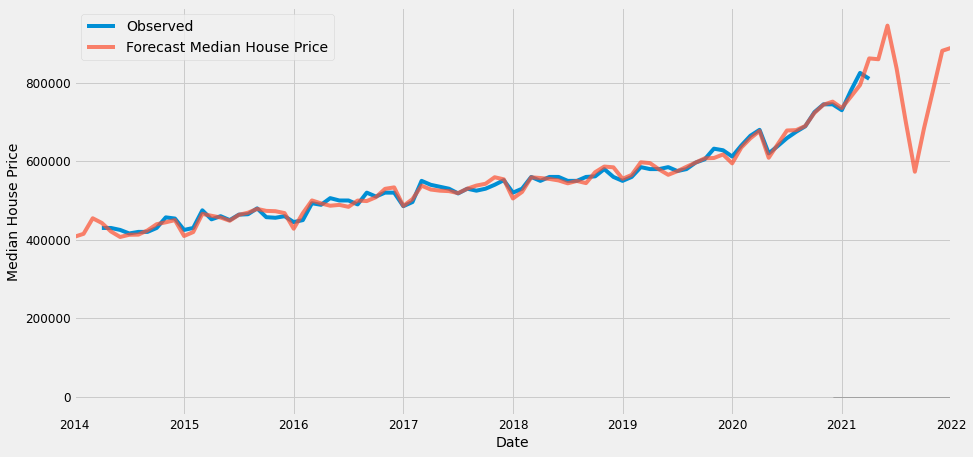

In [41]:
##First attempt at median house price prediction - verdict = not bad, until like, mid-late 2021 - what the heck is up with that crash?
##ok, so, this has to be an issue with the forecasting on the other economic variables - gotta go back and fix that (then I can think about testing out confidence intervals) - must be to do with the economic values I'm feeding in, because generally the forecasts up to that point are doing a pretty good job
ax = df1['Median House Price']['2014-01-31':].plot(label='Observed')
forecast_df_4['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

In [42]:
##ECONOMIC FORECASTING VERSION 2
##dataframe setup
fc_df_1 = data_df[:'2020-12-31'] ##create forecasts from 2021-01-31 onward to avoid the double-up issue in the previous round
fc_df_1 = fc_df_1.drop(columns=['Median House Price', 'Annual Median House Price Growth', 'Sales Volume'])
 ##dropping columns the model doesn't use

fc_df_1

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
Date                                                                    
2014-01-31                     -20.286          44.0        64.900000   
2014-02-28                     -20.286          42.0        64.900000   
2014-03-31                     -20.286          33.0        64.900000   
2014-04-30                     -20.286          35.0        64.766667   
2014-05-31                     -14.758          39.0        64.633333   
...                                ...           ...              ...   
2020-08-31                      26.924          34.0        66.500000   
2020-09-30                      42.079          32.0        66.300000   
2020-10-31                      29.350          29.0        66.566667   
2020-11-30                      33.041          29.0        66.833333   
2020-12-31                      45.774          27.0        67.100000   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
Date                                                                     
2014-01-31           5.900000                                  10241.0   
2014-02-28           5.900000                                  10893.0   
2014-03-31           5.900000                                   8386.0   
2014-04-30           5.633333                                   7130.0   
2014-05-31           5.366667                                   6946.0   
...                       ...                                      ...   
2020-08-31           4.700000                                   4220.0   
2020-09-30           5.100000                                   4323.0   
2020-10-31           5.033333                                   3821.0   
2020-11-30           4.966667                                   3365.0   
2020-12-31           4.900000                                   3912.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-08-31                                     2671.0   
2020-09-30                                     3246.0   
2020-10-31                                     2709.0   
2020-11-30                                     2960.0   
2020-12-31                                     4122.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                                          
2014-01-31                      1644.0                135.8   
2014-02-28                      1768.0                133.0   
2014-03-31                      1999.0                132.0   
2014-04-30                      2082.0                133.5   
2014-05-31                      2125.0                127.6   
...                                ...                  ...   
2020-08-31                      3147.0                100.2   
2020-09-30                      3605.0                100.0   
2020-10-31                      3605.0                108.7   
2020-11-30                      3605.0                106.9   
2020-12-31                      3605.0                112.0   

            Retail Trade Sales (Actual, Current Prices)  \
Date                                                      
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2020-08-31                                 23424.200000   
2020-0

In [43]:
##notes/planning for forecasting these:
##keep OCR at 0.25 - unlikely that reserve bank will move this for now
##following from this, if OCR doesn't change, can probably keep the floating and 2 year interest rates the same as well
##everything else is probably ok to forecast, actually - it's just about how to do that on an individual basis

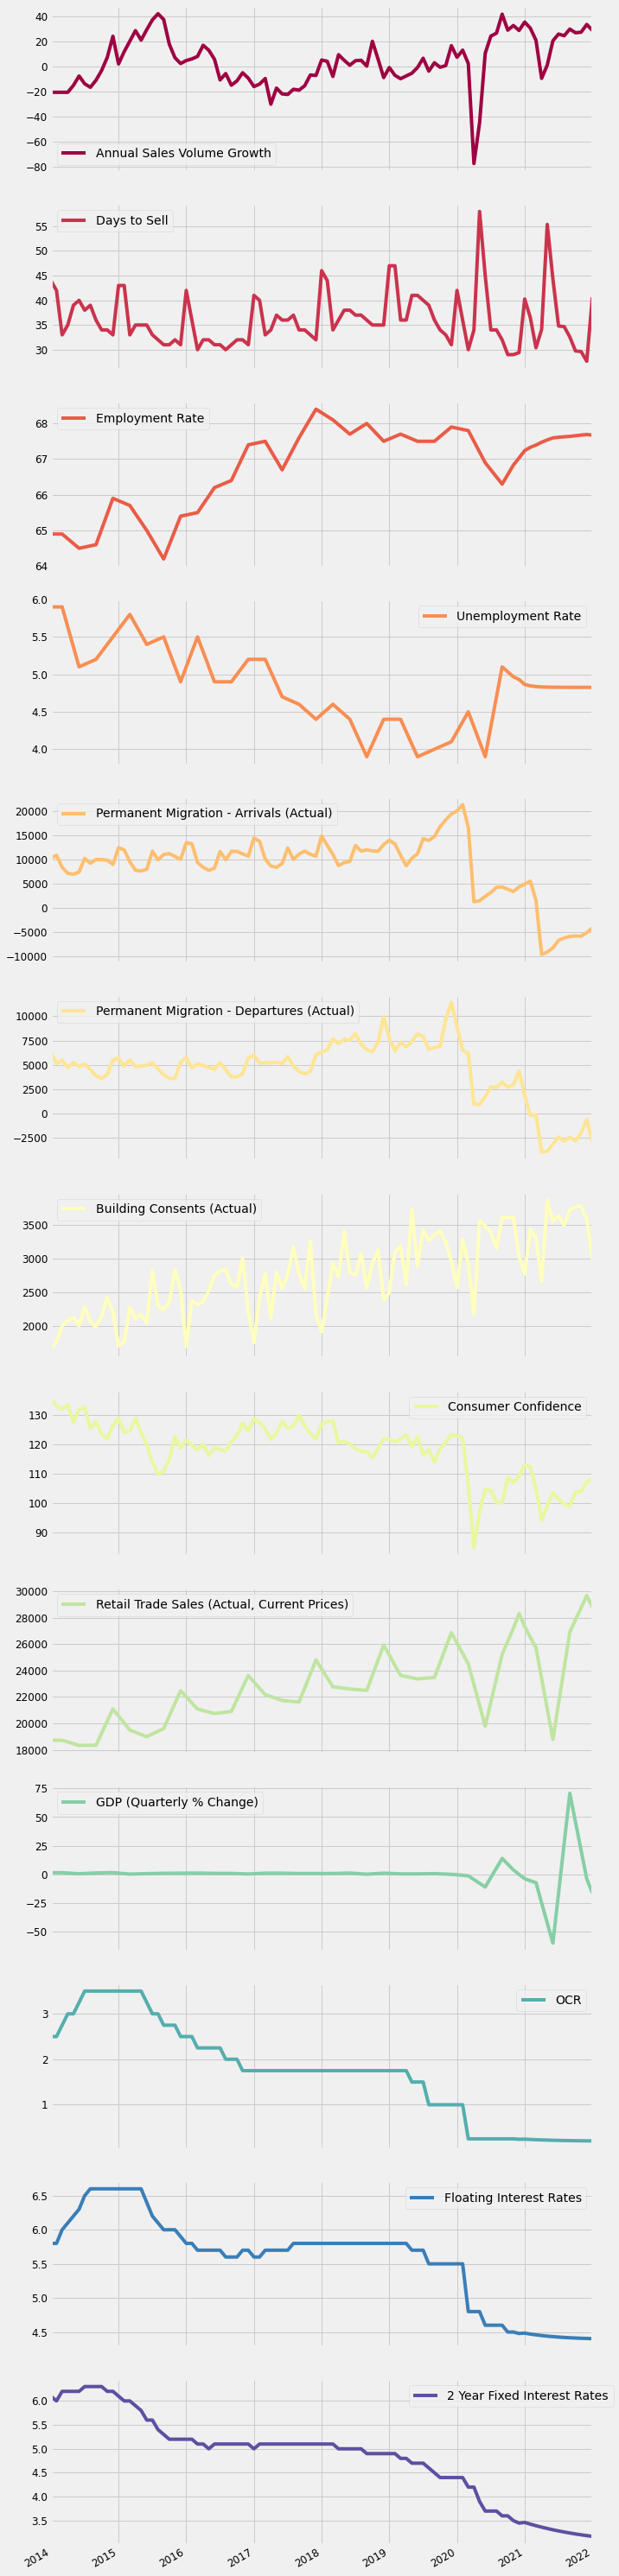

In [44]:
from matplotlib import cm
##checking the forecast variables - trying to ascertain whether all forecast economic data needs to be revisited
check_df = forecast_df_4.copy(deep=True)
check_df = check_df.drop(columns=['Population',  'Predicted Median House Price']) ##note: population growth is probably fine, actually - but dropping it from the graph here for scale reasons

cmap = cm.get_cmap('Spectral')
ax = check_df.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

##Note: predictions were made from 2020-12-31 - so already we can see:
    ##permanent migration forecasts will need to be adjusted on both fronts - that's going crazy on the graph
    ##Retail sales is also predicting a worse April 2020 from the looks of it - that never happened in reality, though, so will need to adjust that forecast as well
    ##I'm assuming the blue line is building consents - that actually looks ok, so can use the original SARIMA parameters for that
    

In [45]:
##Verdict version 2 - after seeing the graphs above:
##-----------------
##OCR and interest rates should be held at current levels
##GDP quarterly % change is definitely off - assuming no more lockdowns, should stay relativlely stable going forward I think - so try forecasting with outliers smoothed
##Retail trade sales - probably need the same treatment as GDP
##Consumer confidence is tricky - could just smooth out the outliers and try forecasting again like the other metrics?
##Building consents seems fine, so can use the current method - no outlier smoothing
##Permanent migration - both arrivals and departures - should really keep going around 2020 levels, maybe keeping the seasonal variation if any - would make the most sense
##Employment and unemployment rates are probably pretty good actually - could always compare against bank forecasts if needed
##Annual sales volume growth and days to sell both seem to be assuming a repeat of April 2020 to some extent, so those should be smoothed out as well

##So: create a dataframe with smoothed and filled outliers and re-predict:
    ##GDP Quartely % Change
    ##Retail Trade Sales
    ##Consumer confidence
    ##Annual Sales Volume Growth
    ##Days to Sell
    ##Building consents << actually probably doesn't really have outliers anyway, hence the less volatile trend in the graphs above
    ##Unemployment Rate
    ##Employment Rate
        ##*adding the last two because why not
##Then just forward fill OCR and both interest rate columns with the Dec 2020 data
##Arrivals and Departures are the trickiest here, since they need to follow the 2020 data and so can't be predicted using the data before that - so, of course, the question is how to do that - really need to keep the seasonality from past years, but forecast on a 2020 magnitude scale - would be less accurate, but could just try predicting with outliers smoothed for now and go from there - may be able to artificially scale it down later anyway

In [46]:
##Smoothing and filling outliers - using fc_df_1
##notes: this is identifying outliers as values above the 75th percentile or below the 25th percentile; 1.5 for k is "the common value", and something more like 3 can be used to identify more extreme outliers

##using Inter Quartile Range
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the upper and lower bounds, good for plotting.
        False returns the masked array
    :type return_thresholds: ``bool``
    """
    ## calculate the interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75-q25
    ## calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: ##identify outliers
        return [True if x < lower or x > upper else False for x in s]

## for comparison, make one array each at varying values of k, if you want to test that
fc_df_2 = fc_df_1.copy(deep=True) ##using the linear interpolated-filled dataframe for this
iqr1 = fc_df_2.apply(out_iqr, k=1.5)

##note: printing iqr1 here will show the boolean mask of outliers generated above

##dealing with the outliers
##replacing outliers with nulls first
for column in fc_df_2:
    fc_df_2[column] = np.where(iqr1[column] == True, 'NaN', fc_df_2[column])

cols_1 = fc_df_2.columns
fc_df_2[cols_1] = fc_df_2[cols_1].apply(pd.to_numeric, errors='coerce') ##probably not strictly needed here, but leaving in anyway

##then using linear interpolation to fill the nulls
fc_df_3 = fc_df_2.interpolate(method='linear', axis=0).bfill().ffill()

fc_df_3 ##dataframe cleaned of outliers, with original gaps filled + outliers filled using linear interpolation

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
Date                                                                    
2014-01-31                     -20.286          44.0        64.900000   
2014-02-28                     -20.286          42.0        64.900000   
2014-03-31                     -20.286          33.0        64.900000   
2014-04-30                     -20.286          35.0        64.766667   
2014-05-31                     -14.758          39.0        64.633333   
...                                ...           ...              ...   
2020-08-31                      26.924          34.0        66.500000   
2020-09-30                      42.079          32.0        66.300000   
2020-10-31                      29.350          29.0        66.566667   
2020-11-30                      33.041          29.0        66.833333   
2020-12-31                      33.041          27.0        67.100000   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
Date                                                                     
2014-01-31           5.900000                                  10241.0   
2014-02-28           5.900000                                  10893.0   
2014-03-31           5.900000                                   8386.0   
2014-04-30           5.633333                                   7130.0   
2014-05-31           5.366667                                   6946.0   
...                       ...                                      ...   
2020-08-31           4.700000                                   4220.0   
2020-09-30           5.100000                                   4323.0   
2020-10-31           5.033333                                   3821.0   
2020-11-30           4.966667                                   3866.5   
2020-12-31           4.900000                                   3912.0   

            Permanent Migration - Departures (Actual)  \
Date                                                    
2014-01-31                                     6368.0   
2014-02-28                                     5116.0   
2014-03-31                                     5489.0   
2014-04-30                                     4706.0   
2014-05-31                                     5239.0   
...                                               ...   
2020-08-31                                     2671.0   
2020-09-30                                     3246.0   
2020-10-31                                     2709.0   
2020-11-30                                     2960.0   
2020-12-31                                     4122.0   

            Building Consents (Actual)  Consumer Confidence  \
Date                                                          
2014-01-31                      1644.0              135.800   
2014-02-28                      1768.0              133.000   
2014-03-31                      1999.0              132.000   
2014-04-30                      2082.0              133.500   
2014-05-31                      2125.0              127.600   
...                                ...                  ...   
2020-08-31                      3147.0              112.050   
2020-09-30                      3605.0              110.375   
2020-10-31                      3605.0              108.700   
2020-11-30                      3605.0              106.900   
2020-12-31                      3605.0              112.000   

            Retail Trade Sales (Actual, Current Prices)  \
Date                                                      
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2020-08-31                                 23424.200000   
2020-0

In [47]:
##Forecasting again, this time with outliers smoothed
cols_list = fc_df_3.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct2 = {}
for i in cols_list:
    dct2['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(fc_df_3[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(fc_df_3[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2021-01-31'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##code for prediction from Mar-20 to Apr-21
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(fc_df_3, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = fc_df_3[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = fc_df_3[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())

dct3 = {key: value[:] for key, value in dct2.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct3.items():
    dct3[key] = list(flatten(dct3[key]))

index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')

fc_df_4 = pd.DataFrame.from_records(dct3, index = index)


##re-sort dataframe to match training set - note for future, columns have to be in the same order or the prediction makes no sense:
cols_order = feature_df.columns.to_list()
fc_df_4 = fc_df_4[cols_order]

fc_df_4

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 24964.844130   
2021-10-31                                 25891.997855   
2021-11-30                                 26819.079385   
2021-12-31                                 26290.965209   
2022-01-31                                 24580.705105   

            GDP (Quarterly % Change)    Population       OCR  \
2014-01-31                  1.5

In [48]:
##sorting out OCR and Interest Rate columns (putting in new cell so above doesn't have to run again):
fc_df_4['OCR'] = fc_df_1['OCR']
fc_df_4['OCR'].loc['2021-01-31':] = fc_df_4['OCR'].loc['2020-12-31']
fc_df_4['Floating Interest Rates'] = fc_df_1['Floating Interest Rates']
fc_df_4['Floating Interest Rates'].loc['2021-01-31':] = fc_df_4['Floating Interest Rates'].loc['2020-12-31']
fc_df_4['2 Year Fixed Interest Rates'] = fc_df_1['2 Year Fixed Interest Rates']
fc_df_4["2 Year Fixed Interest Rates"].loc['2021-01-31':] = fc_df_4["2 Year Fixed Interest Rates"].loc['2020-12-31']

fc_df_4

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 24964.844130   
2021-10-31                                 25891.997855   
2021-11-30                                 26819.079385   
2021-12-31                                 26290.965209   
2022-01-31                                 24580.705105   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

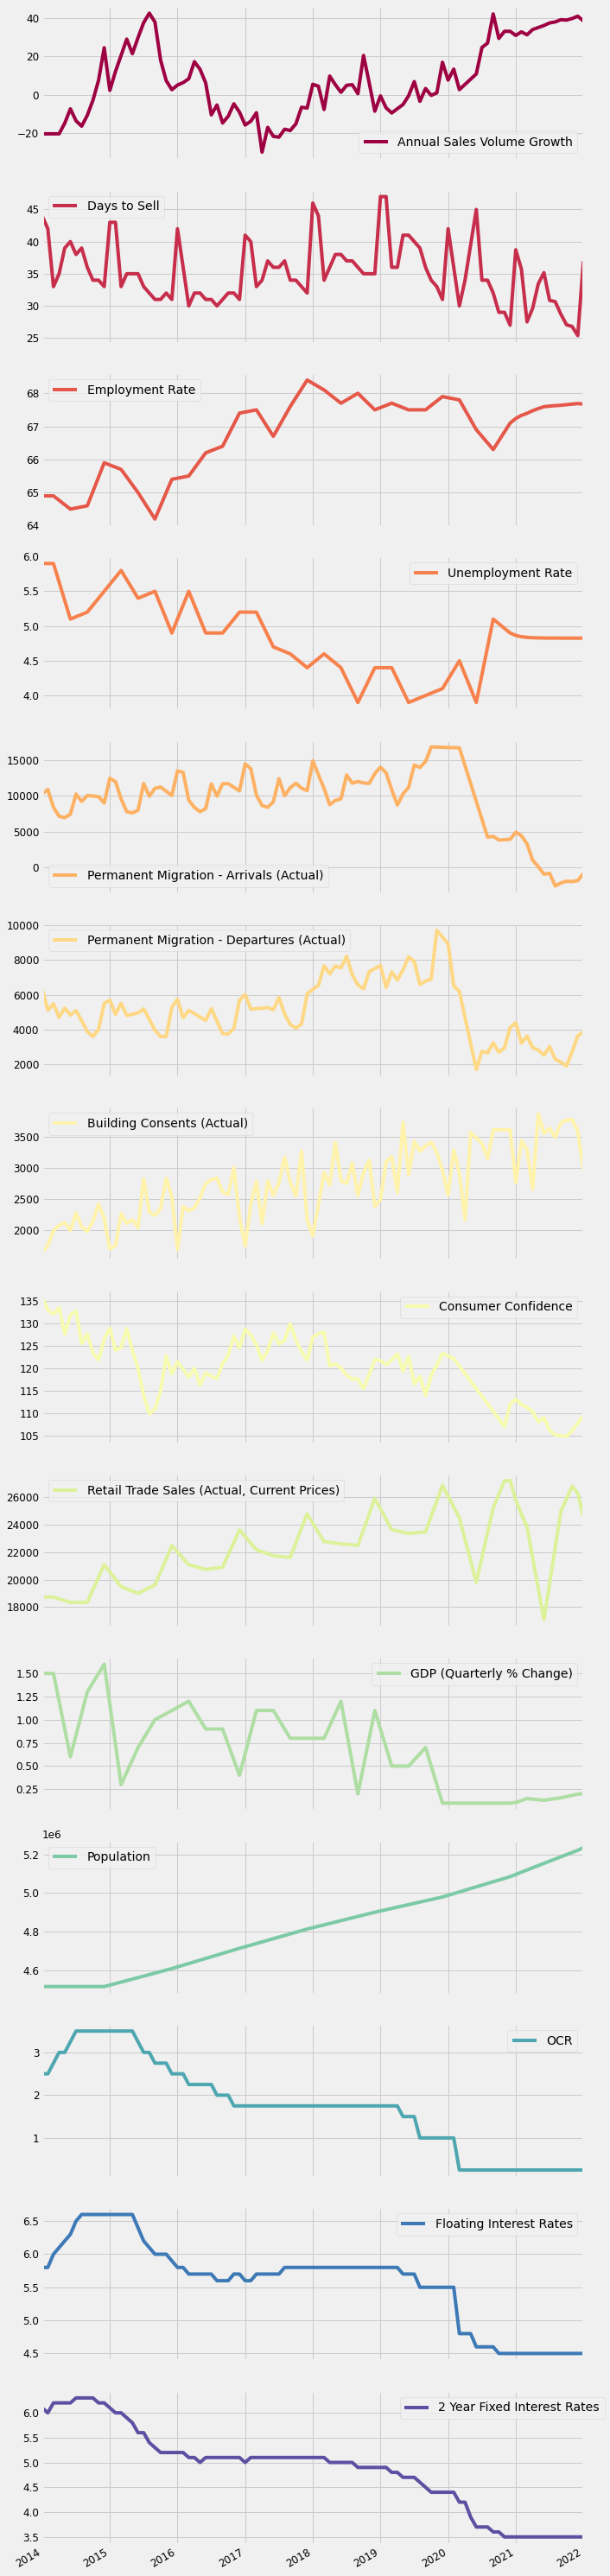

In [49]:
check_df_1 = fc_df_4.copy(deep=True)
# check_df_1 = check_df_1.drop(columns=['Population',  'Predicted Median House Price']) ##note: population growth is probably fine, actually - but dropping it from the graph here for scale reasons

cmap = cm.get_cmap('Spectral')
ax = check_df_1.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()
##Verdict - still not looking perfect to my (admittedly quite untrained) eye, but I'll do some forecasting anyway and see what happens

In [50]:
##now have some predicted data to predict median house price using the trained model
date_list_2 = fc_df_4.index.to_list()

mhp_predicted_1 = []

for i in date_list_2:
    Xnew1 = fc_df_4.loc[i].to_numpy()
    Xnew1 = Xnew1.reshape(1, -1)
    ynew1 = model.predict(Xnew1)
    # for i in range(len(Xnew1)):
	#     print("X=%s, Predicted=%s" % (Xnew1[i], ynew1[i])) ##commenting out for now to keep console clean
    mhp_predicted_1.append(ynew1)

##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list_1 = [arr.tolist() for arr in mhp_predicted_1]
mhp_pred_list_1 = [item for sublist in mhp_pred_list_1 for item in sublist]

fc_df_4['Predicted Median House Price'] = mhp_pred_list_1
fc_df_4

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 24964.844130   
2021-10-31                                 25891.997855   
2021-11-30                                 26819.079385   
2021-12-31                                 26290.965209   
2022-01-31                                 24580.705105   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

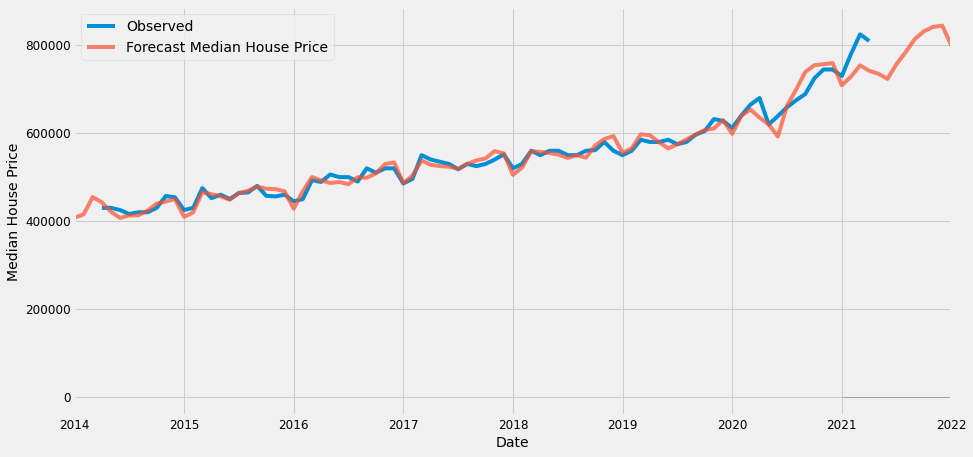

In [51]:
##Verdict: again, not perfect - but, definitely better
    ##this time it's definitely underestimating, but it isn't doing the crazy crash thing it did last time, so that's an improvement - the forecasting on 2020 also isn't as good, which makes sense given the outlier smoothing (outliers being something 2020 would have been full of)
    ##so, one change is that 2020 specifically should really use the unsmoothed data from the first forecast attempt rather than the smoothed data used here
    ##as for the predictions...well, that's the question - maybe if I start by swapping out the 2020 data and going from there?
ax = df1['Median House Price']['2014-01-31':].plot(label='Observed')
fc_df_4['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

In [52]:
##Predictions, take 3
##Swapping 2020 data
fc_df_5 = fc_df_4.copy(deep=True)
fc_df_5.loc['2020-01-31':'2020-12-31'] = forecast_df_4.loc['2020-01-31':'2020-12-31']
##Drop predicted median house price (important to do here)
fc_df_5 = fc_df_5.drop(columns=['Predicted Median House Price'])

fc_df_5

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 24964.844130   
2021-10-31                                 25891.997855   
2021-11-30                                 26819.079385   
2021-12-31                                 26290.965209   
2022-01-31                                 24580.705105   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

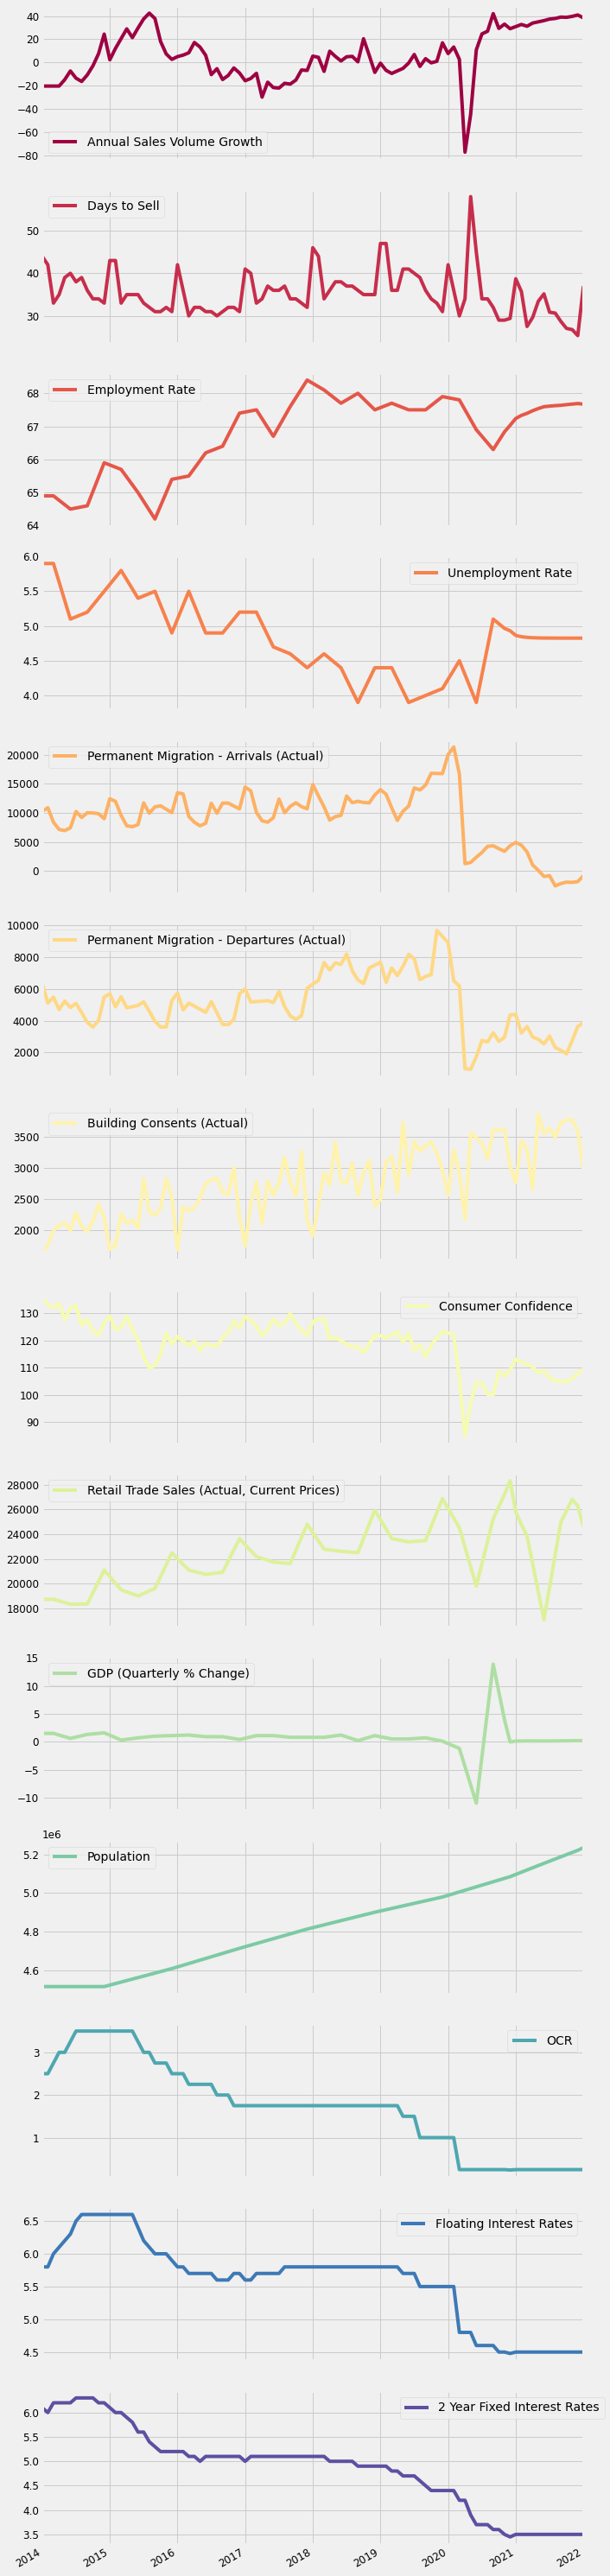

In [53]:
##Checking
check_df_1 = fc_df_5.copy(deep=True)
# check_df_1 = check_df_1.drop(columns=['Population',  'Predicted Median House Price']) ##note: population growth is probably fine, actually - but dropping it from the graph here for scale reasons

cmap = cm.get_cmap('Spectral')
ax = check_df_1.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [54]:
##now have some predicted data to predict median house price using the trained model
date_list_3 = fc_df_5.index.to_list()

mhp_predicted_2 = []

for i in date_list_3:
    Xnew2 = fc_df_5.loc[i].to_numpy()
    Xnew2 = Xnew2.reshape(1, -1)
    ynew2 = model.predict(Xnew2)
    # for i in range(len(Xnew2)):
	#     print("X=%s, Predicted=%s" % (Xnew2[i], ynew2[i])) ##commenting out for now to keep console clean
    mhp_predicted_2.append(ynew2)

##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list_2 = [arr.tolist() for arr in mhp_predicted_2]
mhp_pred_list_2 = [item for sublist in mhp_pred_list_2 for item in sublist]

fc_df_5['Predicted Median House Price'] = mhp_pred_list_2
fc_df_5

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 24964.844130   
2021-10-31                                 25891.997855   
2021-11-30                                 26819.079385   
2021-12-31                                 26290.965209   
2022-01-31                                 24580.705105   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

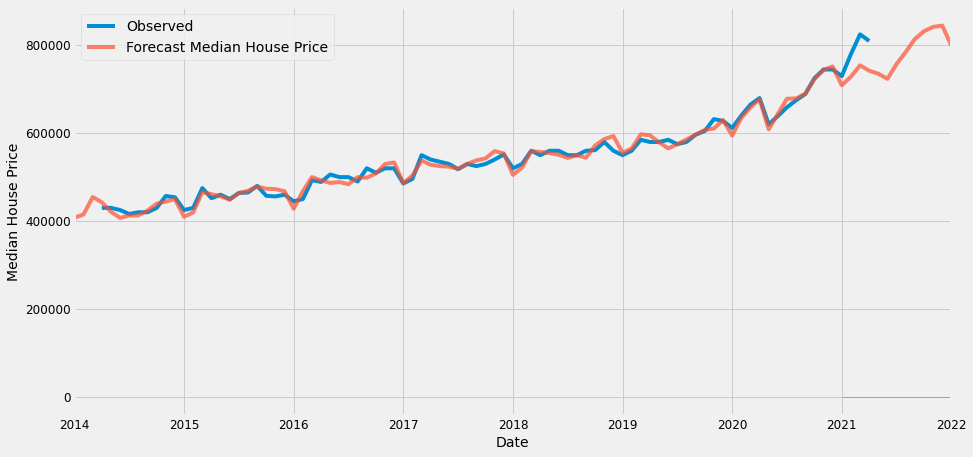

In [55]:
##Verdict: still estimating too low (need to figure out why), but 2020 looks better - will need to check the forecast 2021 input data
    ##so, input data I'm unsure on (or, the to fix list):
        ##Employment and unemployment rates - probably worth checking against bank estimates to be sure - note: after checking, the unemployment rate forecast is actually reasonably similar to Westpac and ASB at least, so will leave employment forecasts as is
        ##Retail trade sales (shouldn't dip like that I think - may be able to get real data to update)
        ##Permanent migration - arrivals - this should be stable or an upward trend I think
        
ax = df1['Median House Price']['2014-01-31':].plot(label='Observed')
fc_df_5['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

In [56]:
##Prediction ideas:
    ##Retail trade sales can probably be re-predicted for 2021 using data up to march 2020, judging by the recovery over 2020
    ##Permanent migration - arrivals remains the challenge, though - the best thing to do is probably to set up the SARIMA forecasting again using data from, say, june 2020 to february 2021 to forecast to the end of 2021, and go from there

In [57]:
##Set up of data with new predictions for Retail Trade Sales and Permanent Migration - Arrivals:
##starting with a separated dataframe to re-incorporate back into the main one after re-predicting:
selection_df = fc_df_5[['Retail Trade Sales (Actual, Current Prices)']][:'2020-03-31']
    
selection_df

Retail Trade Sales (Actual, Current Prices)
2014-01-31                                 18725.300000
2014-02-28                                 18725.300000
2014-03-31                                 18725.300000
2014-04-30                                 18594.266667
2014-05-31                                 18463.233333
...                                                 ...
2019-11-30                                 25743.166667
2019-12-31                                 26874.400000
2020-01-31                                 26087.266667
2020-02-29                                 25300.133333
2020-03-31                                 24513.000000

[75 rows x 1 columns]

In [58]:
##Retail trade sales - forecasting from March 2021:
cols_list = selection_df.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct2 = {}
for i in cols_list:
    dct2['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(selection_df[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(selection_df[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2020-04-30'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##predicting from 2020-04-20 so no gaps, but will replace the 2020 data anyway
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(selection_df, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())

dct3 = {key: value[:] for key, value in dct2.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct3.items():
    dct3[key] = list(flatten(dct3[key]))

index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')

selection_df = pd.DataFrame.from_records(dct3, index = index)

In [59]:
# fc_df_5.loc['2020-01-31':'2020-12-31'] = forecast_df_4.loc['2020-01-31':'2020-12-31']
fill_df = forecast_df_4[['Retail Trade Sales (Actual, Current Prices)']]
selection_df.loc['2020-01-31':'2020-12-31'] = fill_df.loc['2020-01-31':'2020-12-31'] ##just going up to dec 31 2020 here for re-filling - may actually end up doing a final mhp forecasting attempt overlaying all real available data afterward

In [60]:
selection_df

Retail Trade Sales (Actual, Current Prices)
2014-01-31                                 18725.300000
2014-02-28                                 18725.300000
2014-03-31                                 18725.300000
2014-04-30                                 18594.266667
2014-05-31                                 18463.233333
...                                                 ...
2021-09-30                                 25199.773269
2021-10-31                                 26329.261454
2021-11-30                                 27458.768506
2021-12-31                                 28588.282931
2022-01-31                                 27799.692934

[97 rows x 1 columns]

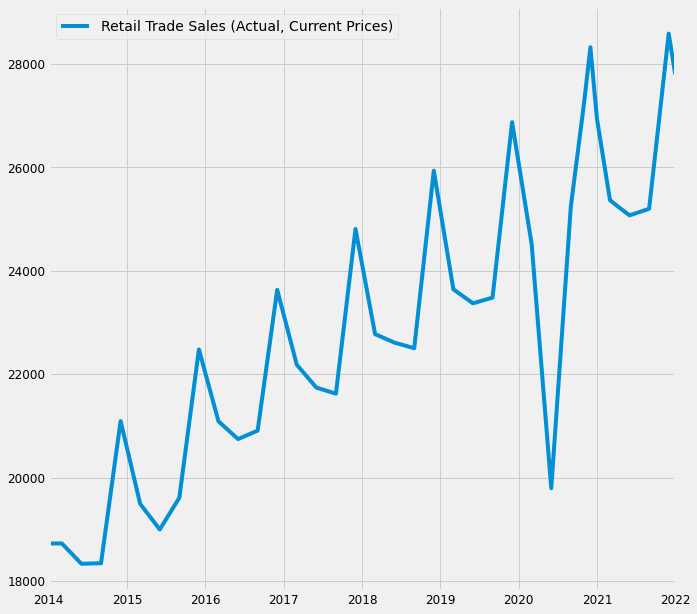

In [61]:
##Happy with this for now
selection_df.plot()
plt.show()

In [62]:
##overwrite new retail forecast into fc_df_5:
fc_df_6 = fc_df_5.copy(deep=True)
fc_df_6['Retail Trade Sales (Actual, Current Prices)'] = selection_df['Retail Trade Sales (Actual, Current Prices)']

fc_df_6

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                             -2199.994491   
2021-10-31           4.826027                             -1953.975813   
2021-11-30           4.825970                             -1998.303920   
2021-12-31           4.825940                             -1866.081051   
2022-01-31           4.825924                              -849.165740   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

In [63]:
##permanent migration - arrivals
##set up the SARIMA forecasting again using data from, say, june 2020 to february 2021 to forecast to the end of 2021, and go from there
##note: this is a second attempt - going to use from march 2020, but smooth outliers
selection_df_1 = fc_df_5[['Permanent Migration - Arrivals (Actual)']]['2020-03-31':'2021-02-28']
selection_df_1

Permanent Migration - Arrivals (Actual)
2020-03-31                             16704.000000
2020-04-30                              1228.000000
2020-05-31                              1440.000000
2020-06-30                              2341.000000
2020-07-31                              3168.000000
2020-08-31                              4220.000000
2020-09-30                              4323.000000
2020-10-31                              3821.000000
2020-11-30                              3365.000000
2020-12-31                              4326.343230
2021-01-31                              4897.779613
2021-02-28                              4419.783327

In [64]:
##Smoothing outliers
iqr1 = selection_df_1.apply(out_iqr, k=1.5)

##note: printing iqr1 here will show the boolean mask of outliers generated above

##dealing with the outliers
##replacing outliers with nulls first
for column in selection_df_1:
    selection_df_1[column] = np.where(iqr1[column] == True, 'NaN', selection_df_1[column])

cols_1 = selection_df_1.columns
selection_df_1[cols_1] = selection_df_1[cols_1].apply(pd.to_numeric, errors='coerce') ##probably not strictly needed here, but leaving in anyway

##then using linear interpolation to fill the nulls
selection_df_1 = selection_df_1.interpolate(method='linear', axis=0).bfill().ffill()

selection_df_1 ##dataframe cleaned of outliers, with original gaps filled + outliers filled using linear interpolation

Permanent Migration - Arrivals (Actual)
2020-03-31                              1228.000000
2020-04-30                              1228.000000
2020-05-31                              1440.000000
2020-06-30                              2341.000000
2020-07-31                              3168.000000
2020-08-31                              4220.000000
2020-09-30                              4323.000000
2020-10-31                              3821.000000
2020-11-30                              3365.000000
2020-12-31                              4326.343230
2021-01-31                              4897.779613
2021-02-28                              4419.783327

In [65]:
cols_list = selection_df_1.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct2 = {}
for i in cols_list:
    dct2['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(selection_df_1[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(selection_df_1[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2021-03-31'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##predicting from 2021-03-31
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(selection_df_1, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_1[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_1[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())

dct3 = {key: value[:] for key, value in dct2.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct3.items():
    dct3[key] = list(flatten(dct3[key]))

index = pd.date_range(start = '2020-03-31', end = '2022-01-31', freq = 'M')

selection_df_1 = pd.DataFrame.from_records(dct3, index = index)

selection_df_1

Permanent Migration - Arrivals (Actual)
2020-03-31                              1228.000000
2020-04-30                              1228.000000
2020-05-31                              1440.000000
2020-06-30                              2341.000000
2020-07-31                              3168.000000
2020-08-31                              4220.000000
2020-09-30                              4323.000000
2020-10-31                              3821.000000
2020-11-30                              3365.000000
2020-12-31                              4326.343230
2021-01-31                              4897.779613
2021-02-28                              4419.783327
2021-03-31                              1228.000000
2021-04-30                              1228.000000
2021-05-31                              1440.000000
2021-06-30                              2341.000000
2021-07-31                              3168.000000
2021-08-31                              4220.000000
2021-09-30                              4323.000000
2021-10-31                              3821.000000
2021-11-30                              3365.000000
2021-12-31                              4326.343230
2022-01-31                              4897.779613

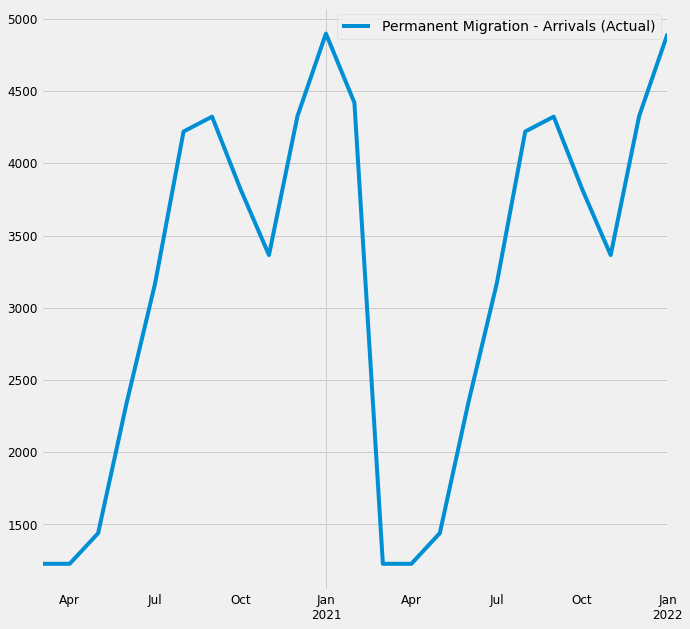

In [66]:
##still not working - need a new plan - it's not particularly scientific probably, but I think I'll just transpose the data up to 2020 and predict from that, then tack the prediction onto the end of the real data
selection_df_1.plot()
plt.show()

In [67]:
selection_df_2 = fc_df_5[['Permanent Migration - Arrivals (Actual)']][:'2019-03-31']
selection_df_2['Permanent Migration - Arrivals (Actual)'] = selection_df_2['Permanent Migration - Arrivals (Actual)']-10000
selection_df_2

Permanent Migration - Arrivals (Actual)
2014-01-31                                    241.0
2014-02-28                                    893.0
2014-03-31                                  -1614.0
2014-04-30                                  -2870.0
2014-05-31                                  -3054.0
...                                             ...
2018-11-30                                   1727.0
2018-12-31                                   3098.0
2019-01-31                                   4008.0
2019-02-28                                   3209.0
2019-03-31                                    859.0

[63 rows x 1 columns]

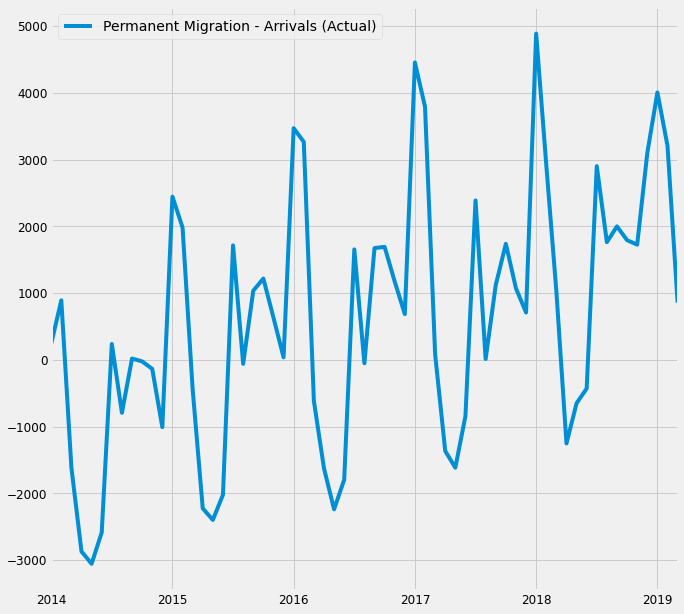

In [68]:
selection_df_2.plot()
plt.show()

In [69]:
##new forecasts - from 2019-04-30 onward:
cols_list = selection_df_2.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct2 = {}
for i in cols_list:
    dct2['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(selection_df_2[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(selection_df_2[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2019-04-30'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##predicting from 2021-03-31
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(selection_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_2[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_2[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())

dct3 = {key: value[:] for key, value in dct2.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct3.items():
    dct3[key] = list(flatten(dct3[key]))

index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')

selection_df_2 = pd.DataFrame.from_records(dct3, index = index)

selection_df_2

Permanent Migration - Arrivals (Actual)
2014-01-31                               241.000000
2014-02-28                               893.000000
2014-03-31                             -1614.000000
2014-04-30                             -2870.000000
2014-05-31                             -3054.000000
...                                             ...
2021-09-30                              3367.108303
2021-10-31                              3452.235591
2021-11-30                              3083.227226
2021-12-31                              3057.526690
2022-01-31                              5925.033866

[97 rows x 1 columns]

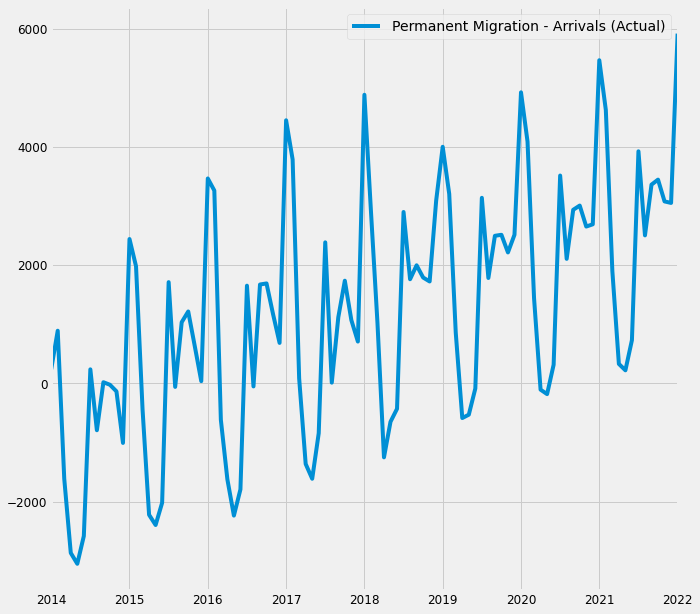

In [70]:
selection_df_2.plot()
plt.show()

In [71]:
##updating with real data to 2020-02-28 fill_df_1 = forecast_df_4[['Retail Trade Sales (Actual, Current Prices)']]
fill_df_1 = forecast_df_4[['Permanent Migration - Arrivals (Actual)']]
selection_df_2.loc[:'2020-02-28'] = fill_df_1.loc[:'2020-02-28']
selection_df_2

Permanent Migration - Arrivals (Actual)
2014-01-31                             10241.000000
2014-02-28                             10893.000000
2014-03-31                              8386.000000
2014-04-30                              7130.000000
2014-05-31                              6946.000000
...                                             ...
2021-09-30                              3367.108303
2021-10-31                              3452.235591
2021-11-30                              3083.227226
2021-12-31                              3057.526690
2022-01-31                              5925.033866

[97 rows x 1 columns]

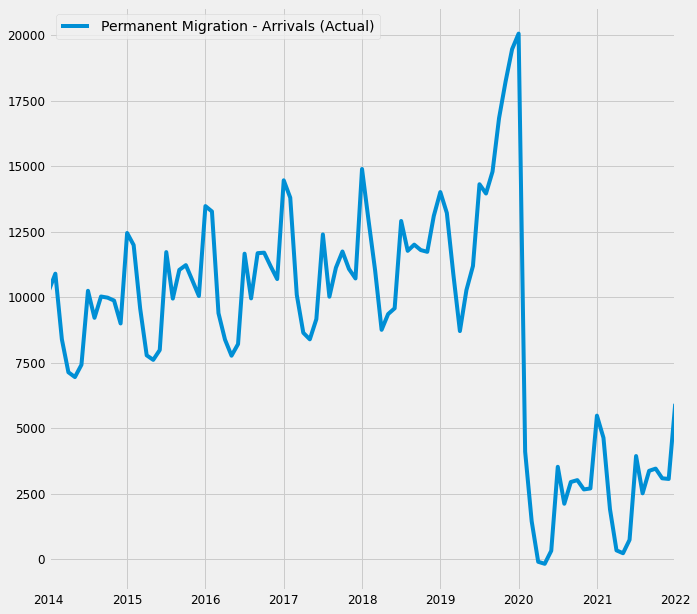

In [72]:
##looking better
selection_df_2.plot()
plt.show()

In [73]:
##overwriting back into the dataframe
fc_df_6['Permanent Migration - Arrivals (Actual)'] = selection_df_2['Permanent Migration - Arrivals (Actual)']

fc_df_6

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

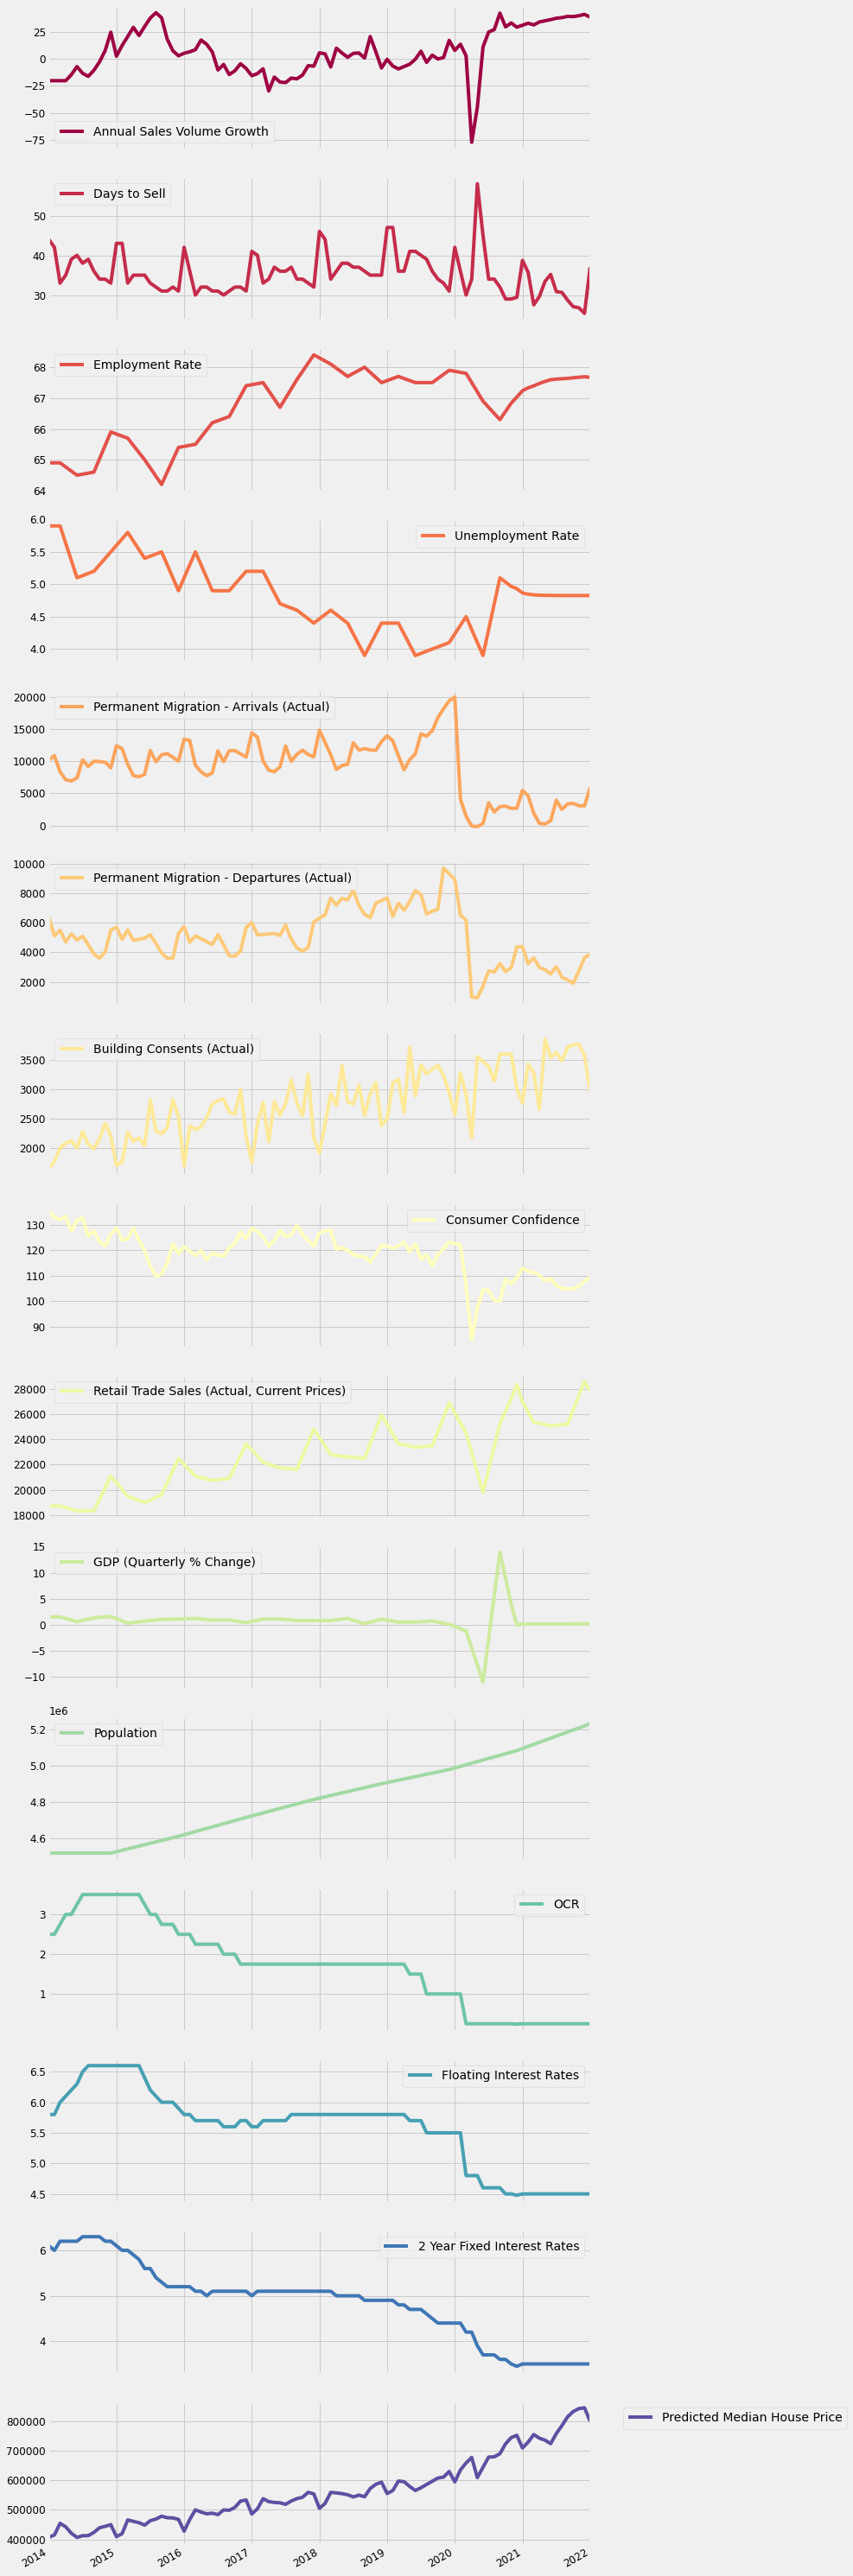

In [74]:
cmap = cm.get_cmap('Spectral')
ax = fc_df_6.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [75]:
##next forecast attempt:
##first, drop the previous attempt's predictions from the dataframe
fc_df_6 = fc_df_6.drop(columns=['Predicted Median House Price'])

fc_df_6

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

In [76]:
##next set of predictions
date_list_4 = fc_df_6.index.to_list()

mhp_predicted_3 = []

for i in date_list_4:
    Xnew3 = fc_df_6.loc[i].to_numpy()
    Xnew3 = Xnew3.reshape(1, -1)
    ynew3 = model.predict(Xnew3)
    # for i in range(len(Xnew3)):
	#     print("X=%s, Predicted=%s" % (Xnew3[i], ynew3[i])) ##commenting out for now to keep console clean
    mhp_predicted_3.append(ynew3)

##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list_3 = [arr.tolist() for arr in mhp_predicted_3]
mhp_pred_list_3 = [item for sublist in mhp_pred_list_3 for item in sublist]

fc_df_6['Predicted Median House Price'] = mhp_pred_list_3
fc_df_6

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

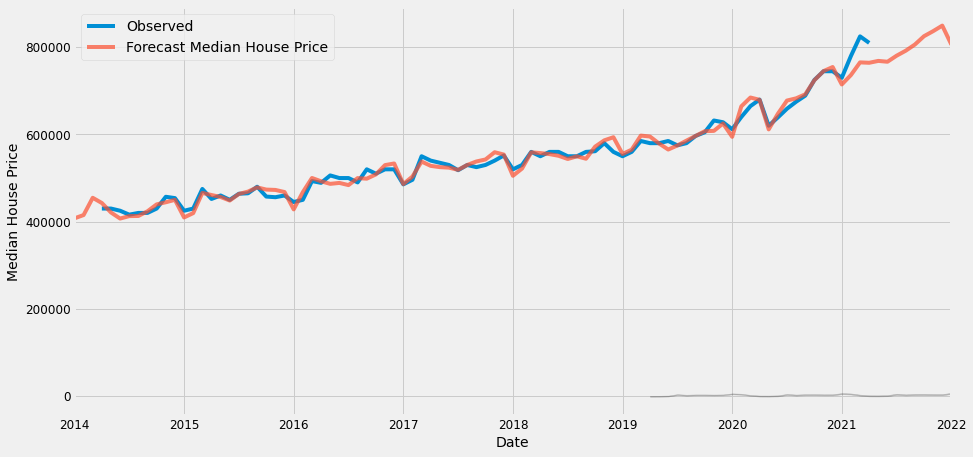

In [77]:
##it's still under - but yet another improvement!
##so the real question is, what are we still missing? For one thing, it's probably worth putting in where we do have real data that's been overwritten with forecasted data in this model
ax = df1['Median House Price']['2014-01-31':].plot(label='Observed')
fc_df_6['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

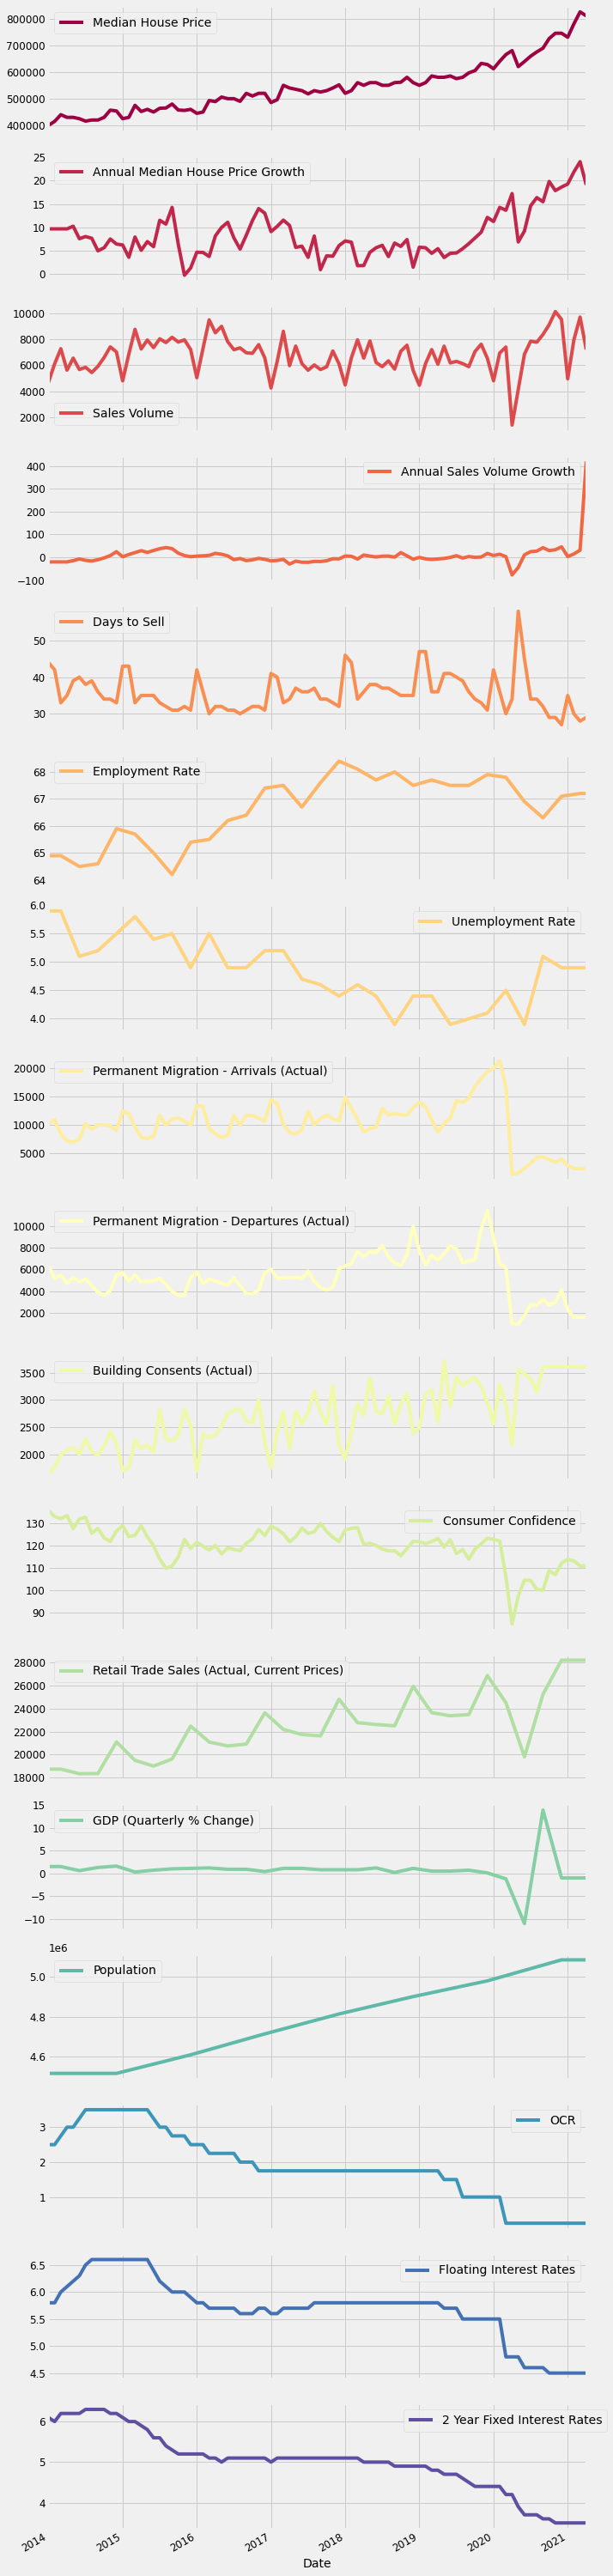

In [78]:
##checking against data_df
##comparing the graphs for fc_df_6 with this:
    ##first, definitely want to overwrite whatever real values are in data_df (or it's filled version up to the NaNs in the original)
    ##second, it might be worth also re-forecasting annual sales volume growth in particular, since the forecasted versions aren't accounting for the effects of 2020's craziness well enough
cmap = cm.get_cmap('Spectral')
ax = data_df.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [79]:
##so, next forecast version:
    ##set up forecast dataframe with values up to most recent real data (interpolated)
    ##re-forecast annual sales growth again if needed
    ##then run another mhp forecast

In [80]:
###most recent real data:
##Annual Sales vol Growth - 2021-04-30
##DTS - 2021-04-30
##Emp rate - 2021-03-31
##unemp rate - 2021-03-31
##perm mig arrivals - 2021-02-28
##perm mig departures - 2021-02-28
## building consents - ??? (but this one's already fine anyway)
##consumer confidence - 2021-03-31
##retail trade sales - 2020-12-31
##gdp - 2020-12-31
##population - 2020-12-31
##ocr - 2021-03-31
##both rates - 2021-03-31

In [81]:
fc_df_7 = fc_df_6.copy(deep=True)
fc_df_7 = fc_df_7.drop(columns=['Predicted Median House Price'])
fc_df_7['Annual Sales Volume Growth'].loc[:'2021-04-30'] = data_df['Annual Sales Volume Growth'].loc[:'2021-04-30']
fc_df_7['Days to Sell'].loc[:'2021-04-30'] = data_df['Days to Sell'].loc[:'2021-04-30']
fc_df_7['Employment Rate'].loc[:'2021-03-31'] = data_df['Employment Rate'].loc[:'2021-03-31']
fc_df_7['Unemployment Rate'].loc[:'2021-03-31'] = data_df['Unemployment Rate'].loc[:'2021-03-31']
fc_df_7['Permanent Migration - Arrivals (Actual)'].loc[:'2021-02-28'] = data_df['Permanent Migration - Arrivals (Actual)'].loc[:'2021-02-28']
fc_df_7['Permanent Migration - Departures (Actual)'].loc[:'2021-02-28'] = data_df['Permanent Migration - Departures (Actual)'].loc[:'2021-02-28']
fc_df_7['Consumer Confidence'].loc[:'2021-03-31'] = data_df['Consumer Confidence'].loc[:'2021-03-31']
fc_df_7['Retail Trade Sales (Actual, Current Prices)'].loc[:'2020-12-31'] = data_df['Retail Trade Sales (Actual, Current Prices)'].loc[:'2020-12-31']
fc_df_7['GDP (Quarterly % Change)'].loc[:'2020-12-31'] = data_df['GDP (Quarterly % Change)'].loc[:'2020-12-31']
fc_df_7['Population'].loc[:'2020-12-31'] = data_df['Population'].loc[:'2020-12-31']
fc_df_7['OCR'].loc[:'2021-03-31'] = data_df['OCR'].loc[:'2021-03-31']
fc_df_7['Floating Interest Rates'].loc[:'2021-03-31'] = data_df['Floating Interest Rates'].loc[:'2021-03-31']
fc_df_7['2 Year Fixed Interest Rates'].loc[:'2021-03-31'] = data_df['2 Year Fixed Interest Rates'].loc[:'2021-03-31']

fc_df_7

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

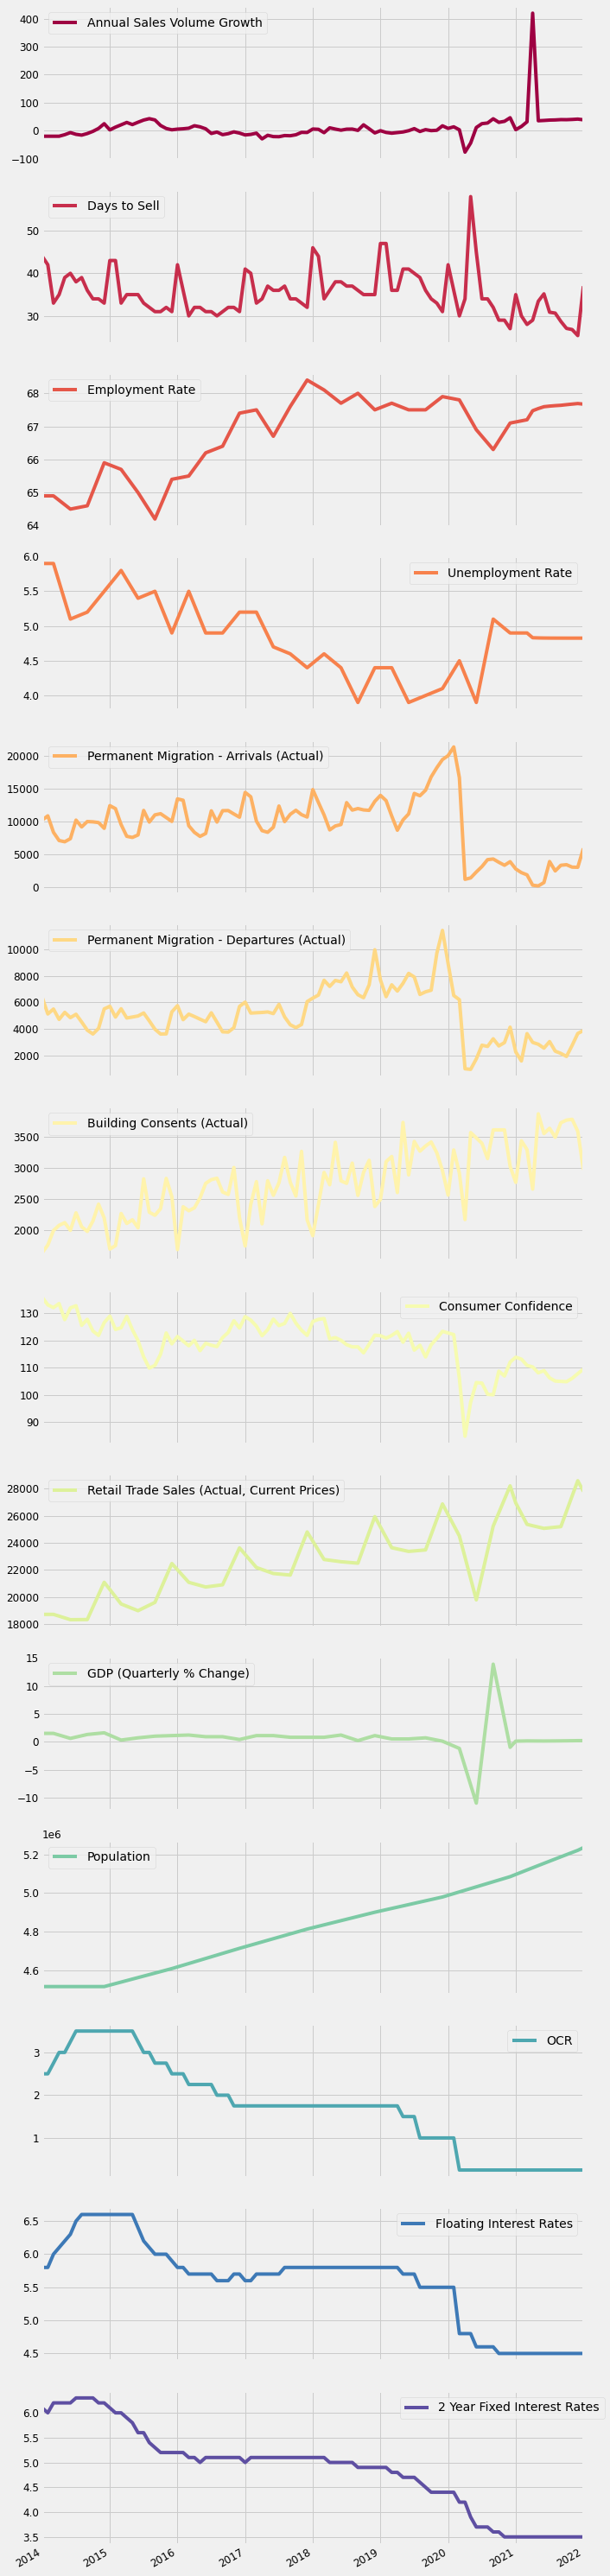

In [82]:
cmap = cm.get_cmap('Spectral')
ax = fc_df_7.plot.line(subplots=True, cmap=cmap, figsize=(10,60))
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [83]:
##re-forecasting annual (residential) sales growth
selection_df_3 = fc_df_7[['Annual Sales Volume Growth']][:'2021-04-30']
selection_df_3

Annual Sales Volume Growth
2014-01-31                     -20.286
2014-02-28                     -20.286
2014-03-31                     -20.286
2014-04-30                     -20.286
2014-05-31                     -14.758
...                                ...
2020-12-31                      45.774
2021-01-31                       3.228
2021-02-28                      14.573
2021-03-31                      31.223
2021-04-30                     419.654

[88 rows x 1 columns]

In [84]:
cols_list = selection_df_3.columns.to_list()
index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')
dct2 = {}
for i in cols_list:
    dct2['%s' % i] = []

for i in cols_list:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] ##the 12 here should be because the data is monthly, but check this

        ##Grid Search for optimal set of parameters for ARIMA model
    aic_list = []
    order_list = []
    s_order_list = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(selection_df_3[i], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                order_list.append(param)
                s_order_list.append(param_seasonal)
                aic_list.append(results.aic)
            except:
                continue
    lowest_aic = min(aic_list)
    aic_index = aic_list.index(lowest_aic)
    order_p = order_list[aic_index]
    order_s_p = s_order_list[aic_index]

    ##Fitting the ARIMA model
    mod = sm.tsa.statespace.SARIMAX(selection_df_3[i], order=order_p, seasonal_order=order_s_p, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()

    pred = results.get_prediction(start=pd.to_datetime('2021-05-31'), end=pd.to_datetime('2022-01-31') ,dynamic=False) ##predicting from 2021-03-31
    pred_ci = pred.conf_int()
    temp_df = pred.predicted_mean.to_frame(i)
    pos = 0
    list_name = 0
    if pos == 0:
        # forecast_df_2 = pd.concat(selection_df_3, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_3[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())
        pos +=1
    else:
        # forecast_df_2 = pd.concat(forecast_df_2, pred_ci) ##rerun to save the confidence intervals later - need to figure out
        dct2['%s' % i] = selection_df_3[i].to_list()
        dct2['%s' % i].append(pred.predicted_mean.to_list())

dct3 = {key: value[:] for key, value in dct2.items()}

def flatten(L):
    for item in L:
        try:
            yield from flatten(item)
        except TypeError:
            yield item

for key, value in dct3.items():
    dct3[key] = list(flatten(dct3[key]))

index = pd.date_range(start = '2014-01-31', end = '2022-01-31', freq = 'M')

selection_df_3 = pd.DataFrame.from_records(dct3, index = index)

selection_df_3

Annual Sales Volume Growth
2014-01-31                  -20.286000
2014-02-28                  -20.286000
2014-03-31                  -20.286000
2014-04-30                  -20.286000
2014-05-31                  -14.758000
...                                ...
2021-09-30                   72.270841
2021-10-31                  109.071857
2021-11-30                   99.441684
2021-12-31                   70.502025
2022-01-31                  169.260713

[97 rows x 1 columns]

In [85]:
fill_df_2 = fc_df_7[['Annual Sales Volume Growth']]
selection_df_3.loc[:'2021-04-30'] = fill_df_2.loc[:'2021-04-30']
selection_df_3

Annual Sales Volume Growth
2014-01-31                  -20.286000
2014-02-28                  -20.286000
2014-03-31                  -20.286000
2014-04-30                  -20.286000
2014-05-31                  -14.758000
...                                ...
2021-09-30                   72.270841
2021-10-31                  109.071857
2021-11-30                   99.441684
2021-12-31                   70.502025
2022-01-31                  169.260713

[97 rows x 1 columns]

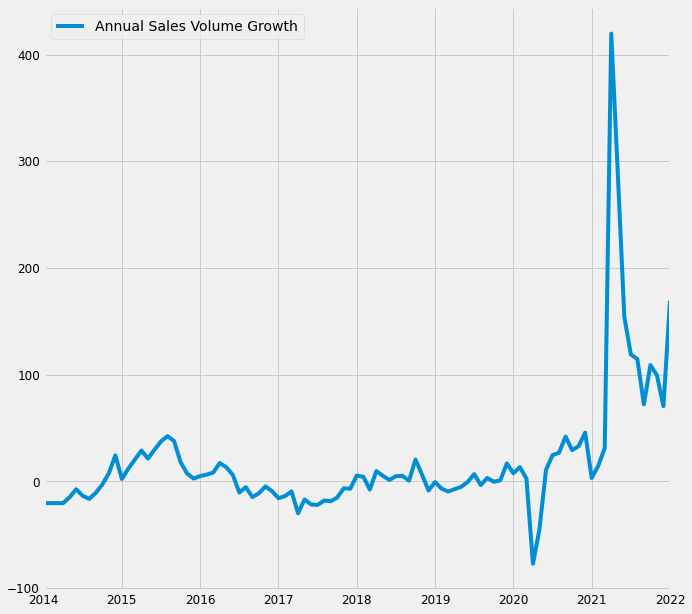

In [86]:
selection_df_3.plot()
plt.show()

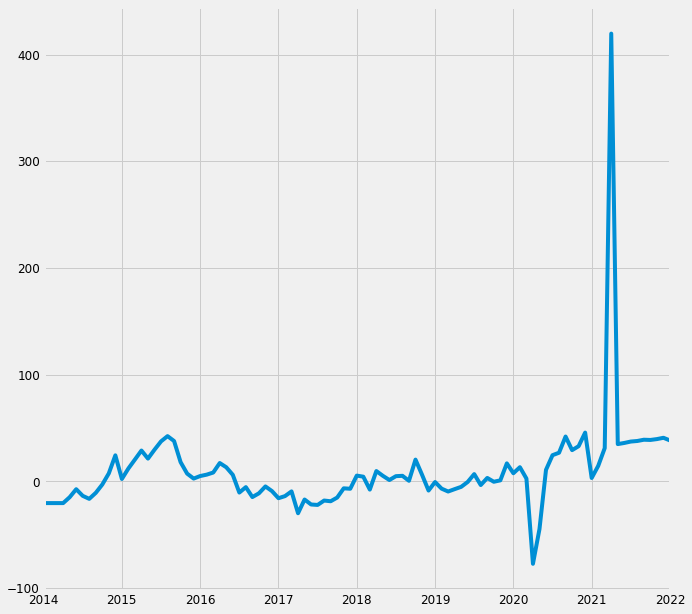

In [87]:
fc_df_7['Annual Sales Volume Growth'].plot()
plt.show()

In [88]:
list_2019 = fc_df_7.loc['2019-01-31':'2019-12-31'].index.to_list()
list_2020 = fc_df_7.loc['2020-01-31':'2020-12-31'].index.to_list()
position1 = 0
for i in list_2019:
    print((fc_df_7['Annual Sales Volume Growth'].loc[list_2020[position1]] - fc_df_7['Annual Sales Volume Growth'].loc[i])/fc_df_7['Annual Sales Volume Growth'].loc[i])
    position1 +=1

-14.784946236559138
-2.9780805687203795
-1.2866383881230117
9.69318181818182
7.812475325700749
-24.26980728051392
2.5740014524328254
-8.984578884934757
11.774438372799029
-105.07801418439718
31.393137254901955
1.7048395674525796


In [89]:
##overwriting back into the dataframe - creating a new dataframe though so I can test both
fc_df_8 = fc_df_7.copy(deep=True)
fc_df_8['Annual Sales Volume Growth'] = selection_df_3['Annual Sales Volume Growth']

fc_df_8

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   72.270841     28.710190        67.637322   
2021-10-31                  109.071857     27.067624        67.656021   
2021-11-30                   99.441684     26.793359        67.673403   
2021-12-31                   70.502025     25.381001        67.689895   
2022-01-31                  169.260713     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

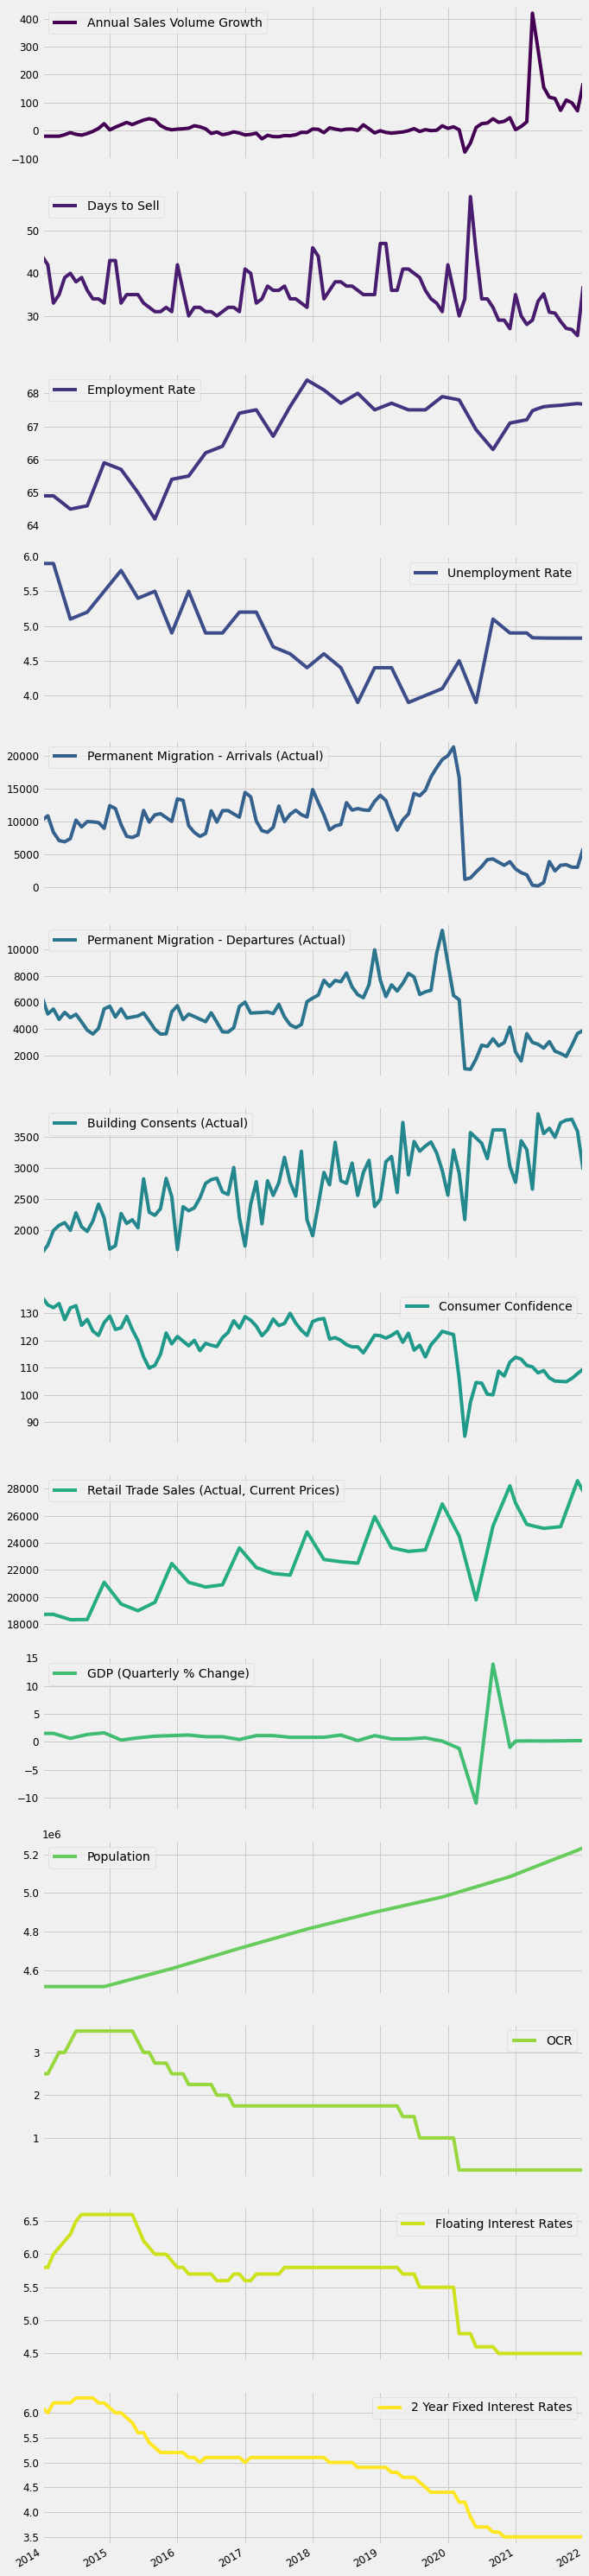

In [108]:
cmap = cm.get_cmap('viridis')
ax = fc_df_8.loc[:,:'2 Year Fixed Interest Rates'].plot.line(subplots=True, cmap=cmap, figsize=(10,60))
# plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

In [91]:
##next set of predictions
date_list_4 = fc_df_8.index.to_list()

mhp_predicted_5 = []

for i in date_list_4:
    Xnew4 = fc_df_8.loc[i].to_numpy()
    Xnew4 = Xnew4.reshape(1, -1)
    ynew4 = model.predict(Xnew4)
    # for i in range(len(Xnew4)):
	#     print("X=%s, Predicted=%s" % (Xnew4[i], ynew4[i])) ##commenting out for now to keep console clean
    mhp_predicted_5.append(ynew4)

##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list_4 = [arr.tolist() for arr in mhp_predicted_5]
mhp_pred_list_4 = [item for sublist in mhp_pred_list_4 for item in sublist]

fc_df_8['Predicted Median House Price'] = mhp_pred_list_4
fc_df_8

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   72.270841     28.710190        67.637322   
2021-10-31                  109.071857     27.067624        67.656021   
2021-11-30                   99.441684     26.793359        67.673403   
2021-12-31                   70.502025     25.381001        67.689895   
2022-01-31                  169.260713     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

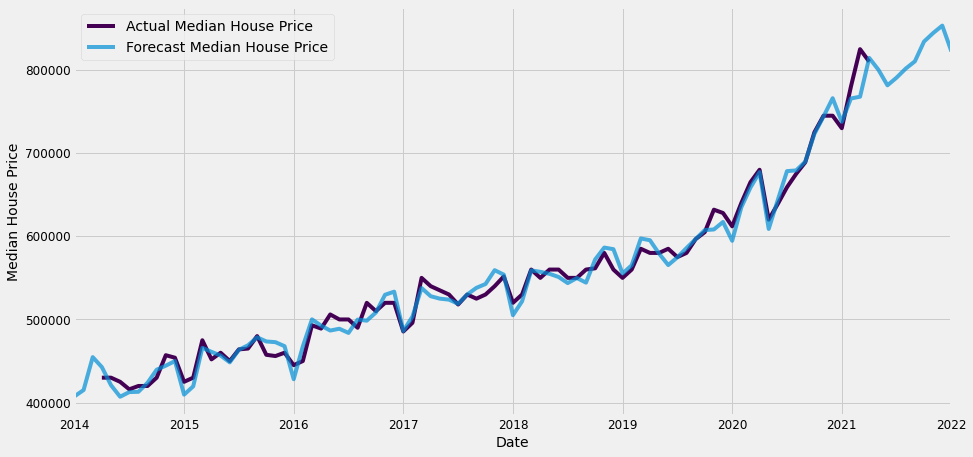

In [114]:
##Verdict - much closer! Still a little low maybe, but getting there for sure - either way, going with this one for now.
##for reference: beginning of 2021 growth predictions: ASB: 15-16%, Westpac: 12.2%, this forecast: ~12.6%
ax = df1['Median House Price']['2014-01-31':].plot(label='Actual Median House Price', cmap='viridis')
fc_df_8['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

# ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()

In [124]:
fc_df_8['Predicted Median House Price'].loc['2021-05-30':]

2021-05-31    800423.198570
2021-06-30    781552.846933
2021-07-31    790837.189807
2021-08-31    801668.772297
2021-09-30    810370.755027
2021-10-31    834131.716280
2021-11-30    844410.015531
2021-12-31    853351.352371
2022-01-31    822356.234260
Freq: M, Name: Predicted Median House Price, dtype: float64

In [93]:
##checking with the un-overwritten sales change data
date_list_5 = fc_df_7.index.to_list()

mhp_predicted_4 = []

for i in date_list_5:
    Xnew5 = fc_df_7.loc[i].to_numpy()
    Xnew5 = Xnew5.reshape(1, -1)
    ynew5 = model.predict(Xnew5)
    # for i in range(len(Xnew5)):
	#     print("X=%s, Predicted=%s" % (Xnew5[i], ynew5[i])) ##commenting out for now to keep console clean
    mhp_predicted_4.append(ynew5)

##convert list of arrays to list of lists to flattened list, and add to dataframe
mhp_pred_list_5 = [arr.tolist() for arr in mhp_predicted_4]
mhp_pred_list_5 = [item for sublist in mhp_pred_list_5 for item in sublist]

fc_df_7['Predicted Median House Price'] = mhp_pred_list_5
fc_df_7

Annual Sales Volume Growth  Days to Sell  Employment Rate  \
2014-01-31                  -20.286000     44.000000        64.900000   
2014-02-28                  -20.286000     42.000000        64.900000   
2014-03-31                  -20.286000     33.000000        64.900000   
2014-04-30                  -20.286000     35.000000        64.766667   
2014-05-31                  -14.758000     39.000000        64.633333   
...                                ...           ...              ...   
2021-09-30                   39.093672     28.710190        67.637322   
2021-10-31                   38.886105     27.067624        67.656021   
2021-11-30                   39.693531     26.793359        67.673403   
2021-12-31                   40.916834     25.381001        67.689895   
2022-01-31                   38.413202     36.967553        67.672422   

            Unemployment Rate  Permanent Migration - Arrivals (Actual)  \
2014-01-31           5.900000                             10241.000000   
2014-02-28           5.900000                             10893.000000   
2014-03-31           5.900000                              8386.000000   
2014-04-30           5.633333                              7130.000000   
2014-05-31           5.366667                              6946.000000   
...                       ...                                      ...   
2021-09-30           4.826136                              3367.108303   
2021-10-31           4.826027                              3452.235591   
2021-11-30           4.825970                              3083.227226   
2021-12-31           4.825940                              3057.526690   
2022-01-31           4.825924                              5925.033866   

            Permanent Migration - Departures (Actual)  \
2014-01-31                                6368.000000   
2014-02-28                                5116.000000   
2014-03-31                                5489.000000   
2014-04-30                                4706.000000   
2014-05-31                                5239.000000   
...                                               ...   
2021-09-30                                2142.411128   
2021-10-31                                1916.604169   
2021-11-30                                2747.097726   
2021-12-31                                3645.860320   
2022-01-31                                3870.657129   

            Building Consents (Actual)  Consumer Confidence  \
2014-01-31                 1644.000000           135.800000   
2014-02-28                 1768.000000           133.000000   
2014-03-31                 1999.000000           132.000000   
2014-04-30                 2082.000000           133.500000   
2014-05-31                 2125.000000           127.600000   
...                                ...                  ...   
2021-09-30                 3718.386372           104.936610   
2021-10-31                 3760.704057           104.810422   
2021-11-30                 3773.548286           106.034103   
2021-12-31                 3582.630243           107.772074   
2022-01-31                 2968.843810           109.437500   

            Retail Trade Sales (Actual, Current Prices)  \
2014-01-31                                 18725.300000   
2014-02-28                                 18725.300000   
2014-03-31                                 18725.300000   
2014-04-30                                 18594.266667   
2014-05-31                                 18463.233333   
...                                                 ...   
2021-09-30                                 25199.773269   
2021-10-31                                 26329.261454   
2021-11-30                                 27458.768506   
2021-12-31                                 28588.282931   
2022-01-31                                 27799.692934   

            GDP (Quarterly % Change)    Population   OCR  \
2014-01-31                  1.50000

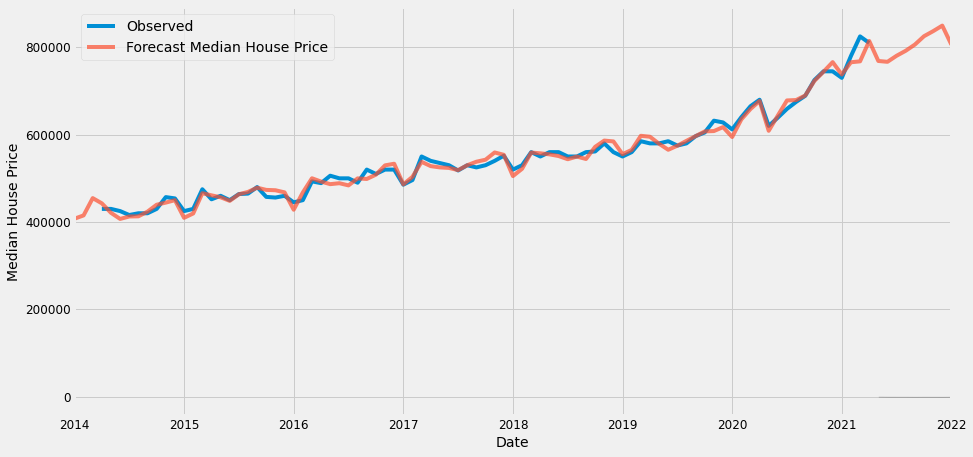

In [94]:
##Also happpy with this one - Would probably go with fc_df_8 for the trend, and could always do some more tweaking here and there, but this seems to be a great place to end for now.
ax = df1['Median House Price']['2014-01-31':].plot(label='Observed')
fc_df_7['Predicted Median House Price'].plot(ax=ax, label='Forecast Median House Price', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median House Price')
plt.legend()

plt.show()